Comprehensive Autoimmune Disorder Dataset - Exploratory Data Analysis

The dataset was downloaded from Kaggle website: https://www.kaggle.com/datasets/abdullahragheb/all-autoimmune-disorder-10k/data

In [86]:
#libraries
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)  # Wyświetla wszystkie kolumny


Data aquisition form database

In [87]:
# connection to database
db_name = '../database/db_autoimmune_disorders.db' 
conn = sqlite3.connect(db_name)

# import data to DataFrame
query = "SELECT t.*,d.* FROM tbl_all_research_results t LEFT JOIN tbl_disorders_description d ON t.Diagnosis = d.Diseases_eng;"
df= pd.read_sql_query(query, conn)

# close connection
conn.close()

Checking data types

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12510 entries, 0 to 12509
Data columns (total 85 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient_ID                            12510 non-null  int64  
 1   Age                                   12510 non-null  object 
 2   Gender                                12510 non-null  object 
 3   Diagnosis                             12510 non-null  object 
 4   Sickness_Duration_Months              12510 non-null  int64  
 5   RBC_Count                             12510 non-null  object 
 6   Hemoglobin                            12510 non-null  object 
 7   Hematocrit                            12510 non-null  object 
 8   MCV                                   12510 non-null  object 
 9   MCH                                   12510 non-null  object 
 10  MCHC                                  12510 non-null  float64
 11  RDW            

First look at the dataset to check if data types are correct

In [89]:
df.head() 

Patient_ID Age  Gender                                        Diagnosis  \
0           1  65  Female                               Linear IgA disease   
1           2  61    Male                                  Dermatomyositis   
2           3  42    Male                                Ord's thyroiditis   
3           4  45  Female                           Restless legs syndrome   
4           5  78  Female  Autoimmune polyendocrine syndrome type 2 (APS2)   

   Sickness_Duration_Months RBC_Count Hemoglobin Hematocrit    MCV    MCH  \
0                        26      3.54      13.18      44.35  99.85   31.8   
1                       106      4.97      14.73      42.39  94.86  29.94   
2                         6      3.91      13.66      42.41  88.26  29.43   
3                        11      4.57      14.96       40.1  85.95  27.42   
4                        30      4.88      11.21      37.58  93.16  29.87   

    MCHC    RDW Reticulocyte_Count WBC_Count  Neutrophils  Lymphocytes  \
0  33.12  12.52               2.08      8278        72.25        19.80   
1  31.07  15.15               1.21      8592        56.73        42.68   
2  35.61  15.52               2.68      8719        50.92        31.21   
3  33.93  12.14               1.79      7698        41.20        33.60   
4  31.29  15.65               1.42      9755        45.82        42.57   

   Monocytes  Eosinophils  Basophils  PLT_Count    MPV  ANA  Esbach  \
0       9.26         4.02       1.08     429117   8.08    1    1.50   
1       2.66         1.67       1.16     487184   8.92    1    1.76   
2       6.96         4.32       1.07     499962   7.70    1    2.49   
3       6.54         3.12       0.72     129793  10.95    1    0.75   
4       3.05         4.60       1.40     467390  10.51    1    0.76   

   MBL_Level  ESR    C3    C4   CRP  Anti-dsDNA  Anti-Sm  Rheumatoid factor  \
0       1.81   40  1.32  0.49  3.10         1.0      1.0                0.0   
1       1.08   23  0.40  0.17  2.73         0.0      0.0                1.0   
2       1.42   44  0.95  0.26  1.02         1.0      0.0                1.0   
3       1.05   25  1.06  0.26  5.45         0.0      1.0                0.0   
4       1.14   42  0.73  0.25  1.05         0.0      1.0                0.0   

   ACPA  Anti-TPO  Anti-Tg  Anti-SMA  Low-grade fever  \
0   1.0       0.0      1.0       1.0                0   
1   1.0       0.0      1.0       0.0                1   
2   1.0       1.0      1.0       1.0                0   
3   1.0       1.0      1.0       0.0                1   
4   1.0       0.0      0.0       1.0                0   

   Fatigue or chronic tiredness  Dizziness  Weight loss  \
0                             1          1            0   
1                             0          0            1   
2                             1          1            0   
3                             0          1            1   
4                             1          1            1   

   Rashes and skin lesions  Stiffness in the joints  \
0                        0                        0   
1                        1                        0   
2                        1                        0   
3                        1                        0   
4                        0                        1   

   Brittle hair or hair loss  Dry eyes and/or mouth  General unwell feeling  \
0                          0                      0                       1   
1                          1                      0                       0   
2                          0                      0                       0   
3                          1                      1                       1   
4                          0                      0                       1   

   Joint pain  Anti_dsDNA  Anti_enterocyte_antibodies  anti_LKM1  Anti_RNP  \
0           1           0                           0          0         0   
1           1           0                           0          0

In [90]:
df.tail()

Patient_ID Age  Gender Diagnosis  Sickness_Duration_Months RBC_Count  \
12505       12506  43            Normal                         0      5.09   
12506       12507      Female    Normal                         0      5.09   
12507       12508  28    Male    Normal                         0      5.09   
12508       12509      Female    Normal                         0      5.09   
12509       12510  78    Male    Normal                         0      5.09   

      Hemoglobin Hematocrit    MCV    MCH   MCHC    RDW Reticulocyte_Count  \
12505      16.65      46.63  81.99         35.77  13.61               1.39   
12506      16.65      46.63  81.99         35.77  13.61                      
12507      16.65      46.63         27.96  35.77                      1.39   
12508      16.65      46.63                35.77                      1.39   
12509      16.65      46.63  81.99         35.77  13.61                      

      WBC_Count  Neutrophils  Lymphocytes  Monocytes  Eosinophils  Basophils  \
12505                  47.08        30.12       5.15         1.18       0.93   
12506     10383        47.08        30.12       5.15         1.18       0.93   
12507     10383        47.08        30.12       5.15         1.18       0.93   
12508     10383        47.08        30.12       5.15         1.18       0.93   
12509     10383        47.08        30.12       5.15         1.18       0.93   

       PLT_Count   MPV  ANA  Esbach  MBL_Level  ESR    C3    C4   CRP  \
12505     193520  9.04    0    1.27        0.4    0  0.89  0.29  0.49   
12506     193520  9.04    0    1.27        0.4    0  0.89  0.29  0.49   
12507     193520  9.04    0    1.27        0.4    0  0.89  0.29  0.49   
12508     193520  9.04    0    1.27        0.4    0  0.89  0.29  0.49   
12509     193520  9.04    0    1.27        0.4    0  0.89  0.29  0.49   

       Anti-dsDNA  Anti-Sm  Rheumatoid factor  ACPA  Anti-TPO  Anti-Tg  \
12505         NaN      NaN                NaN   NaN       NaN      NaN   
12506         NaN      NaN                NaN   NaN       NaN      NaN   
12507         NaN      NaN                NaN   NaN       NaN      NaN   
12508         NaN      NaN                NaN   NaN       NaN      NaN   
12509         NaN      NaN                NaN   NaN       NaN      NaN   

       Anti-SMA  Low-grade fever  Fatigue or chronic tiredness  Dizziness  \
12505       NaN                0                             0          0   
12506       NaN                0                             0          0   
12507       NaN                0                             0          0   
12508       NaN                0                             0          0   
12509       NaN                0                             0          0   

       Weight loss  Rashes and skin lesions  Stiffness in the joints  \
12505            0                        0                        0   
12506            0                        0                        0   
12507            0                        0                        0   
12508            0                        0                        0   
12509            0                        0                        0   

       Brittle hair or hair loss  Dry eyes and/or mouth  \
12505                          0                      0   
12506                          0                      0   
12507                          0                      0   
12508                          0                      0   
12509                          0                      0   

       General unwell feeling  Joint pain  Anti_dsDNA  \
12505                       0           0           0   
12506                       0           0           0   
12507                       0           0           0   
12508                       0           0           0   
12509                       0           0           0   

       Anti_enterocyte_antibodies  anti_LKM1  Anti_RNP  ASCA  Anti_Ro_SSA  \
12505                      

In [91]:
# checking columns with object type
for el in df.select_dtypes(include=['object']).columns.tolist():
    print(el)

Age
Gender
Diagnosis
RBC_Count
Hemoglobin
Hematocrit
MCV
MCH
RDW
Reticulocyte_Count
WBC_Count
Diseases_eng
Diseases_pl
Diseases_group
Description_eng
Description_pl


As we can see some of these columns shouldn't be object - Hemoglobin, Hematocrit, MCV, MCH, RDW, RBC_Count, Reticulocyte_Count should be float; Age, WBC_Count, should be int.
Additionaly Anti-dsDNA, Anti-Sm, Rheumatoid factor, ACPA, Anti-TPO, Anti-Tg, Anti-SMA are float type and they should be int as well.

In [92]:
# changing type for float variables
float_list = ['Age','Hemoglobin','Hematocrit','MCV','MCH','RDW','RBC_Count','Reticulocyte_Count','WBC_Count']

for col in float_list:
    df[col] = np.where(df[col]=='', np.nan, df[col])
    df[col] = df[col].apply(float)
    
# replacing NaN values with 0 for Age, WBC_Count, Anti-dsDNA, Anti-Sm, Rheumatoid factor, ACPA, Anti-TPO, Anti-Tg, Anti-SMA
df[['Age','WBC_Count', 'Anti-dsDNA', 'Anti-Sm', 'Rheumatoid factor', 'ACPA', 'Anti-TPO', 'Anti-Tg', 'Anti-SMA']] = np.where(df[['Age','WBC_Count', 'Anti-dsDNA', 'Anti-Sm', 'Rheumatoid factor', 'ACPA', 'Anti-TPO', 'Anti-Tg', 'Anti-SMA']].isna(), 0, df[['Age','WBC_Count', 'Anti-dsDNA', 'Anti-Sm', 'Rheumatoid factor', 'ACPA', 'Anti-TPO', 'Anti-Tg', 'Anti-SMA']])

# changing type for Age, WBC_Count, Anti-dsDNA, Anti-Sm, Rheumatoid factor, ACPA, Anti-TPO, Anti-Tg, Anti-SMA into int64
df[['Age','WBC_Count', 'Anti-dsDNA', 'Anti-Sm', 'Rheumatoid factor', 'ACPA', 'Anti-TPO', 'Anti-Tg', 'Anti-SMA']] = df[['Age','WBC_Count', 'Anti-dsDNA', 'Anti-Sm', 'Rheumatoid factor', 'ACPA', 'Anti-TPO', 'Anti-Tg', 'Anti-SMA']].astype(np.int64)


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12510 entries, 0 to 12509
Data columns (total 85 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient_ID                            12510 non-null  int64  
 1   Age                                   12510 non-null  int64  
 2   Gender                                12510 non-null  object 
 3   Diagnosis                             12510 non-null  object 
 4   Sickness_Duration_Months              12510 non-null  int64  
 5   RBC_Count                             12509 non-null  float64
 6   Hemoglobin                            12508 non-null  float64
 7   Hematocrit                            12508 non-null  float64
 8   MCV                                   12507 non-null  float64
 9   MCH                                   12506 non-null  float64
 10  MCHC                                  12510 non-null  float64
 11  RDW            

Missing data analysis

In [94]:
# looking at the NaN values and assigning all of them to their variables
nan_dict = {}

for col in list(df.columns):
    nan_dict[col] = df[col].isna().sum()
    
nan_dict

{'Patient_ID': 0,
 'Age': 0,
 'Gender': 0,
 'Diagnosis': 0,
 'Sickness_Duration_Months': 0,
 'RBC_Count': 1,
 'Hemoglobin': 2,
 'Hematocrit': 2,
 'MCV': 3,
 'MCH': 4,
 'MCHC': 0,
 'RDW': 4,
 'Reticulocyte_Count': 5,
 'WBC_Count': 0,
 'Neutrophils': 0,
 'Lymphocytes': 0,
 'Monocytes': 0,
 'Eosinophils': 0,
 'Basophils': 0,
 'PLT_Count': 0,
 'MPV': 0,
 'ANA': 0,
 'Esbach': 0,
 'MBL_Level': 0,
 'ESR': 0,
 'C3': 0,
 'C4': 0,
 'CRP': 0,
 'Anti-dsDNA': 0,
 'Anti-Sm': 0,
 'Rheumatoid factor': 0,
 'ACPA': 0,
 'Anti-TPO': 0,
 'Anti-Tg': 0,
 'Anti-SMA': 0,
 'Low-grade fever': 0,
 'Fatigue or chronic tiredness': 0,
 'Dizziness': 0,
 'Weight loss': 0,
 'Rashes and skin lesions': 0,
 'Stiffness in the joints': 0,
 'Brittle hair or hair loss': 0,
 'Dry eyes and/or mouth': 0,
 'General unwell feeling': 0,
 'Joint pain': 0,
 'Anti_dsDNA': 0,
 'Anti_enterocyte_antibodies': 0,
 'anti_LKM1': 0,
 'Anti_RNP': 0,
 'ASCA': 0,
 'Anti_Ro_SSA': 0,
 'Anti_CBir1': 0,
 'Anti_BP230': 0,
 'Anti_tTG': 0,
 'DGP': 0,
 

In [95]:
# defining which columns have significant (above 100 observations) number of NaNs 
nans_above_100 = []

for key in nan_dict.keys():
    if nan_dict[key] > 100:
        nans_above_100.append(key)
    else:
        continue

print(nans_above_100)

# other variables
nans_below_100 = []

for key in nan_dict.keys():
    if key not in nans_above_100:
        nans_below_100.append(key)
    else:
        continue

print(nans_below_100)

[]
['Patient_ID', 'Age', 'Gender', 'Diagnosis', 'Sickness_Duration_Months', 'RBC_Count', 'Hemoglobin', 'Hematocrit', 'MCV', 'MCH', 'MCHC', 'RDW', 'Reticulocyte_Count', 'WBC_Count', 'Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils', 'Basophils', 'PLT_Count', 'MPV', 'ANA', 'Esbach', 'MBL_Level', 'ESR', 'C3', 'C4', 'CRP', 'Anti-dsDNA', 'Anti-Sm', 'Rheumatoid factor', 'ACPA', 'Anti-TPO', 'Anti-Tg', 'Anti-SMA', 'Low-grade fever', 'Fatigue or chronic tiredness', 'Dizziness', 'Weight loss', 'Rashes and skin lesions', 'Stiffness in the joints', 'Brittle hair or hair loss', 'Dry eyes and/or mouth', 'General unwell feeling', 'Joint pain', 'Anti_dsDNA', 'Anti_enterocyte_antibodies', 'anti_LKM1', 'Anti_RNP', 'ASCA', 'Anti_Ro_SSA', 'Anti_CBir1', 'Anti_BP230', 'Anti_tTG', 'DGP', 'Anti_BP180', 'ASMA', 'Anti_IF', 'IgG_IgE_receptor', 'Anti_SRP', 'Anti_desmoglein_3', 'Anti_La_SSB', 'Anti_Jo1', 'ANCA', 'anti_centromere', 'Anti_desmoglein_1', 'EMA', 'Anti_type_VII_collagen', 'C1_inhibitor', 'Anti_T

In [96]:
# we can drop without consequences nan observations for column in nans_below_100
df = df[nans_below_100].dropna()

In [97]:
# filling NaNs with 0 for nans_above_100
df = df.fillna(0)

In [98]:
nan_dict = {}

for col in list(df.columns):
    nan_dict[col] = df[col].isna().sum()
    
nan_dict

{'Patient_ID': 0,
 'Age': 0,
 'Gender': 0,
 'Diagnosis': 0,
 'Sickness_Duration_Months': 0,
 'RBC_Count': 0,
 'Hemoglobin': 0,
 'Hematocrit': 0,
 'MCV': 0,
 'MCH': 0,
 'MCHC': 0,
 'RDW': 0,
 'Reticulocyte_Count': 0,
 'WBC_Count': 0,
 'Neutrophils': 0,
 'Lymphocytes': 0,
 'Monocytes': 0,
 'Eosinophils': 0,
 'Basophils': 0,
 'PLT_Count': 0,
 'MPV': 0,
 'ANA': 0,
 'Esbach': 0,
 'MBL_Level': 0,
 'ESR': 0,
 'C3': 0,
 'C4': 0,
 'CRP': 0,
 'Anti-dsDNA': 0,
 'Anti-Sm': 0,
 'Rheumatoid factor': 0,
 'ACPA': 0,
 'Anti-TPO': 0,
 'Anti-Tg': 0,
 'Anti-SMA': 0,
 'Low-grade fever': 0,
 'Fatigue or chronic tiredness': 0,
 'Dizziness': 0,
 'Weight loss': 0,
 'Rashes and skin lesions': 0,
 'Stiffness in the joints': 0,
 'Brittle hair or hair loss': 0,
 'Dry eyes and/or mouth': 0,
 'General unwell feeling': 0,
 'Joint pain': 0,
 'Anti_dsDNA': 0,
 'Anti_enterocyte_antibodies': 0,
 'anti_LKM1': 0,
 'Anti_RNP': 0,
 'ASCA': 0,
 'Anti_Ro_SSA': 0,
 'Anti_CBir1': 0,
 'Anti_BP230': 0,
 'Anti_tTG': 0,
 'DGP': 0,
 

Duplicates analysis - there is no duplicated rows (patients) in the dataset

In [99]:
df.duplicated().sum()

0

Outlier detection

In [100]:
# Z-score for float columns

float_columns = df.select_dtypes(include=['float64']).columns

results = {}

for col in float_columns:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers_count = (z_scores > 3).sum()
    if outliers_count >= 0:
        results[col] = outliers_count

for col, count in results.items():
    print(f"Column: {col} - Number of outliers: {count}")

Column: RBC_Count - Number of outliers: 0
Column: Hemoglobin - Number of outliers: 0
Column: Hematocrit - Number of outliers: 0
Column: MCV - Number of outliers: 0
Column: MCH - Number of outliers: 0
Column: MCHC - Number of outliers: 0
Column: RDW - Number of outliers: 0
Column: Reticulocyte_Count - Number of outliers: 0
Column: Neutrophils - Number of outliers: 0
Column: Lymphocytes - Number of outliers: 0
Column: Monocytes - Number of outliers: 0
Column: Eosinophils - Number of outliers: 0
Column: Basophils - Number of outliers: 0
Column: MPV - Number of outliers: 0
Column: Esbach - Number of outliers: 0
Column: MBL_Level - Number of outliers: 0
Column: C3 - Number of outliers: 0
Column: C4 - Number of outliers: 0
Column: CRP - Number of outliers: 0


There are no outliers in float type columns

In [101]:
# Z-score for int columns with more than two values (not a binary columns)

int_columns = ['PLT_Count', 'Age', 'Sickness_Duration_Months', 'WBC_Count', 'ESR']

results = {}

for col in int_columns:
  col_data = df[col]
  z_scores = np.abs(stats.zscore(col_data))
  outliers_count = (z_scores > 3).sum()
  if outliers_count >= 0:
    results[col] = outliers_count

for col, count in results.items():
  print(f"Column: {col} - Number od outliers: {count}")

Column: PLT_Count - Number od outliers: 0
Column: Age - Number od outliers: 0
Column: Sickness_Duration_Months - Number od outliers: 0
Column: WBC_Count - Number od outliers: 0
Column: ESR - Number od outliers: 0


There are no outliers in int type columns with more then two values

To check outliers and/or error data values for binary columns we can create frequency tables with value counts, percentages and mode value.

In [102]:
df_drop = df.drop(['Patient_ID', 'PLT_Count', 'Age', 'Sickness_Duration_Months', 'WBC_Count', 'ESR', 'Diseases_ID'], axis=1)

binary_columns = df_drop.select_dtypes(include=['int64']).columns

categorical_stats = {} 

for col in binary_columns:
    value_counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    mode = df[col].mode()[0]
    
    categorical_stats[col] = pd.DataFrame({
        'Count': value_counts,
        'Percentage': round(percentages,2),
        'Mode': [mode] * len(value_counts)
    })

for var, stats in categorical_stats.items():
    print(f"Statistics for {var}:")
    print(stats)
    print("\n")

Statistics for ANA:
     Count  Percentage  Mode
ANA                         
1     7119       56.96     1
0     5380       43.04     1


Statistics for Anti-dsDNA:
            Count  Percentage  Mode
Anti-dsDNA                         
0            7475        59.8     0
1            5024        40.2     0


Statistics for Anti-Sm:
         Count  Percentage  Mode
Anti-Sm                         
0         7511       60.09     0
1         4988       39.91     0


Statistics for Rheumatoid factor:
                   Count  Percentage  Mode
Rheumatoid factor                         
0                   7581       60.65     0
1                   4918       39.35     0


Statistics for ACPA:
      Count  Percentage  Mode
ACPA                         
0      7499        60.0     0
1      5000        40.0     0


Statistics for Anti-TPO:
          Count  Percentage  Mode
Anti-TPO                         
0          7602       60.82     0
1          4897       39.18     0


Statistics for An

There are no outliers and error data values in binary columns. However, some binary variables exhibit a significant imbalance in the frequency of their categories (very low variance) and they should be removed from the dataset.

Creating diseases group id - this is our target (label) column and it's object type

In [103]:
df['Patient_ID'].duplicated().sum()

0

In [104]:
# unique values for diagnosis and their id 
diagnosis_dictionary = df[['Diseases_group']].drop_duplicates().reset_index(drop=True)
diagnosis_dictionary['Diseases_group_id'] = diagnosis_dictionary['Diseases_group'].astype('category').cat.codes
diagnosis_dictionary

Diseases_group  Diseases_group_id
0            Skin and Mucosal Diseases                  7
1             Musculoskeletal Diseases                  4
2       Thyroid and Endocrine Diseases                  8
3                Neurological Diseases                  5
4                        Miscellaneous                  3
5                    Vascular Diseases                  9
6          Kidney and Urinary Diseases                  2
7  Gastrointestinal and Liver Diseases                  0
8               Immune System Diseases                  1
9                               Normal                  6

In [105]:
# count values for each Diseases_group in oue dataset
dis_group_counts = np.unique(df['Diseases_group'], return_counts=True)

print(f'We have {len(dis_group_counts[0])} groups of autoimmune diseases in our dataset\n')

for el, count in zip(dis_group_counts[0],dis_group_counts[1]):
    print(f'{el}: {count}')

We have 10 groups of autoimmune diseases in our dataset

Gastrointestinal and Liver Diseases: 561
Immune System Diseases: 514
Kidney and Urinary Diseases: 431
Miscellaneous: 1258
Musculoskeletal Diseases: 1106
Neurological Diseases: 2122
Normal: 2499
Skin and Mucosal Diseases: 1387
Thyroid and Endocrine Diseases: 1222
Vascular Diseases: 1399


In [106]:
# columns to drop
columns_to_drop = ['Patient_ID','Diseases_eng','Diagnosis','Diseases_pl','Diseases_ID','Description_eng','Description_pl','Recommendation']

# dropping above columns
df = df.drop(columns=columns_to_drop, errors='ignore', axis=1)

Numerical columns analysis

In [107]:
# numerical variables in our dataset
numeric_var = [el for el in df.select_dtypes(include=['float64','int64']).columns if el in nans_below_100]
numeric_var

['Age',
 'Sickness_Duration_Months',
 'RBC_Count',
 'Hemoglobin',
 'Hematocrit',
 'MCV',
 'MCH',
 'MCHC',
 'RDW',
 'Reticulocyte_Count',
 'WBC_Count',
 'Neutrophils',
 'Lymphocytes',
 'Monocytes',
 'Eosinophils',
 'Basophils',
 'PLT_Count',
 'MPV',
 'ANA',
 'Esbach',
 'MBL_Level',
 'ESR',
 'C3',
 'C4',
 'CRP',
 'Anti-dsDNA',
 'Anti-Sm',
 'Rheumatoid factor',
 'ACPA',
 'Anti-TPO',
 'Anti-Tg',
 'Anti-SMA',
 'Low-grade fever',
 'Fatigue or chronic tiredness',
 'Dizziness',
 'Weight loss',
 'Rashes and skin lesions',
 'Stiffness in the joints',
 'Brittle hair or hair loss',
 'Dry eyes and/or mouth',
 'General unwell feeling',
 'Joint pain',
 'Anti_dsDNA',
 'Anti_enterocyte_antibodies',
 'anti_LKM1',
 'Anti_RNP',
 'ASCA',
 'Anti_Ro_SSA',
 'Anti_CBir1',
 'Anti_BP230',
 'Anti_tTG',
 'DGP',
 'Anti_BP180',
 'ASMA',
 'Anti_IF',
 'IgG_IgE_receptor',
 'Anti_SRP',
 'Anti_desmoglein_3',
 'Anti_La_SSB',
 'Anti_Jo1',
 'ANCA',
 'anti_centromere',
 'Anti_desmoglein_1',
 'EMA',
 'Anti_type_VII_collagen',

In [108]:
for var in list(['Age','Sickness_Duration_Months','WBC_Count','PLT_Count','ESR']):
    df[var] = df[var].apply(float)

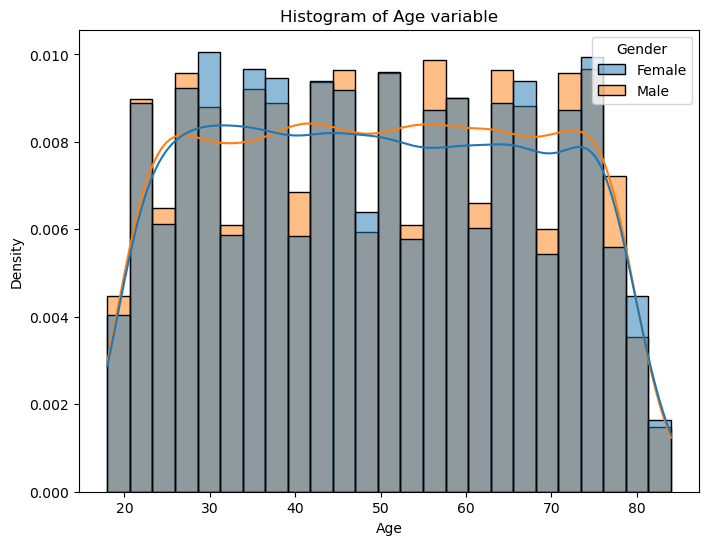

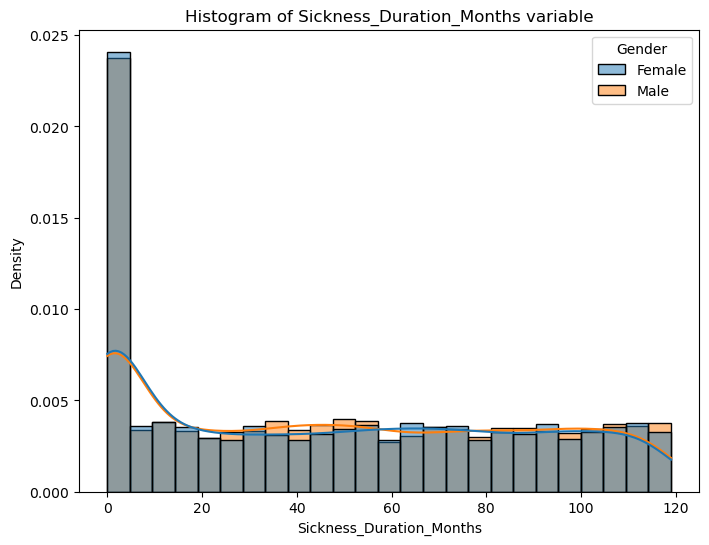

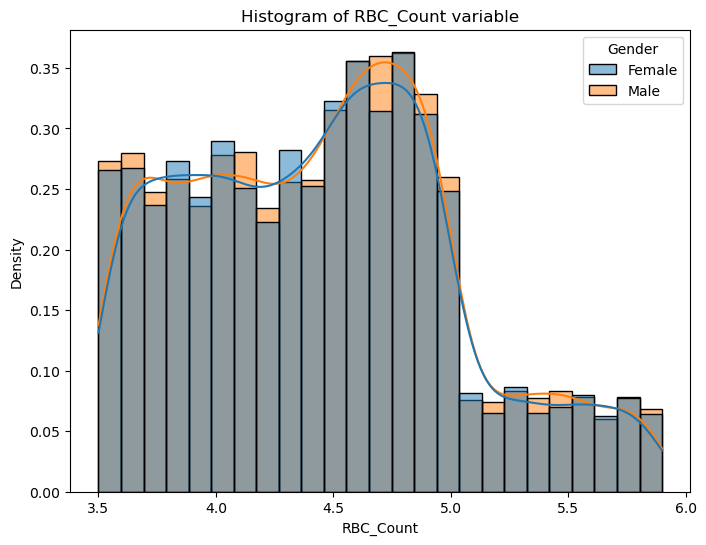

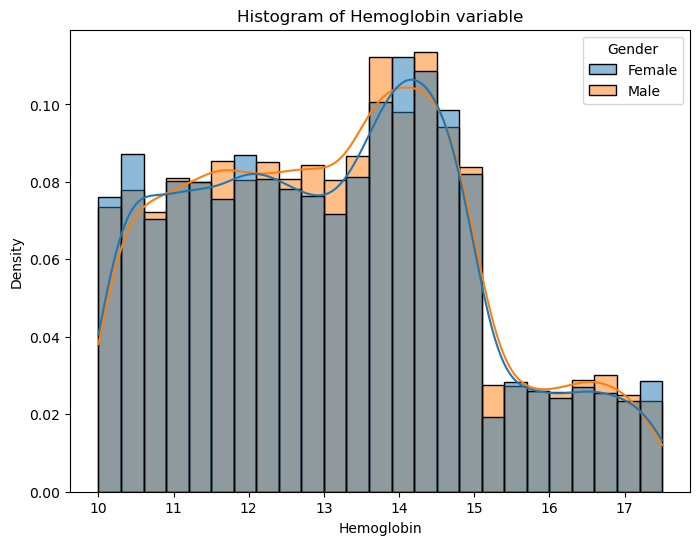

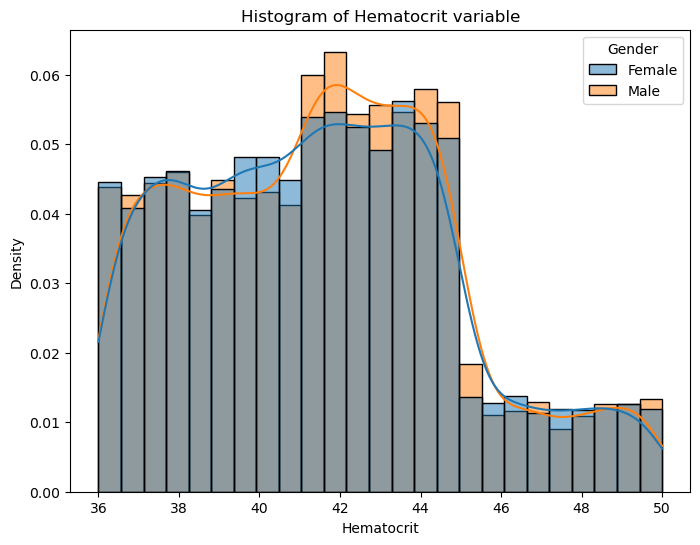

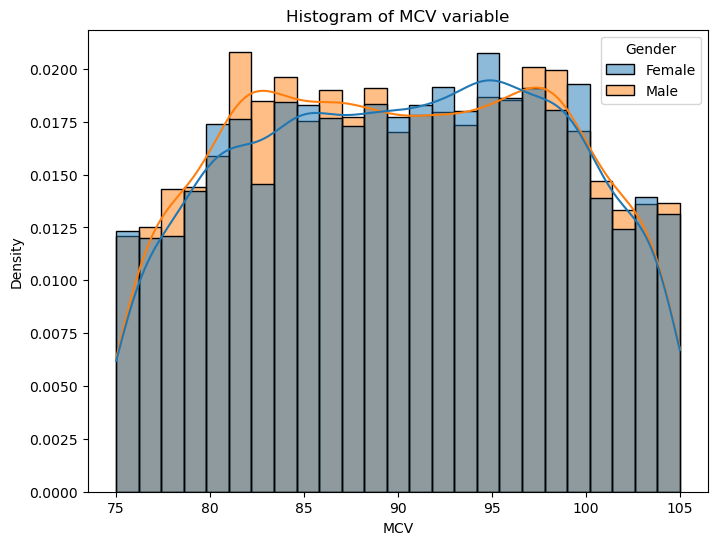

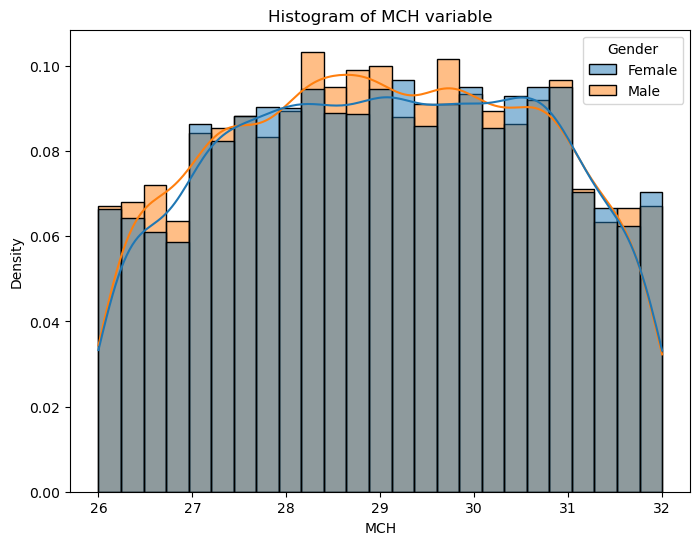

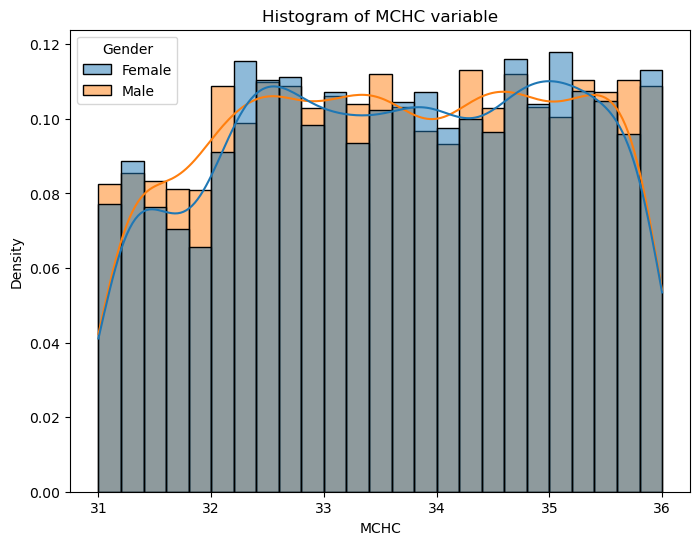

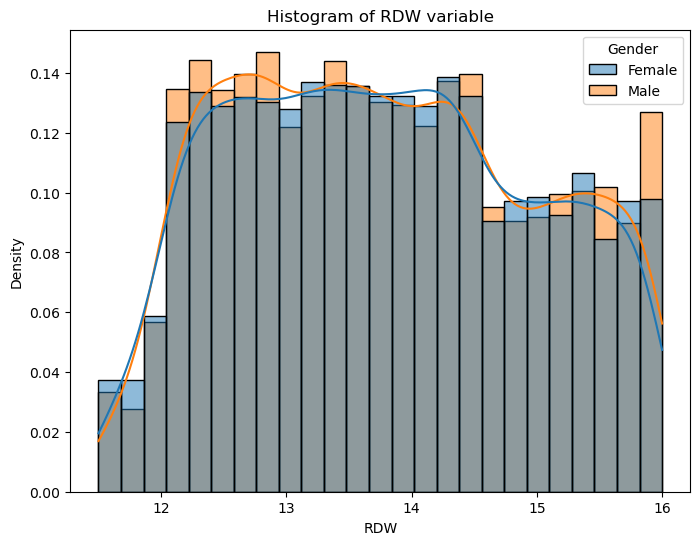

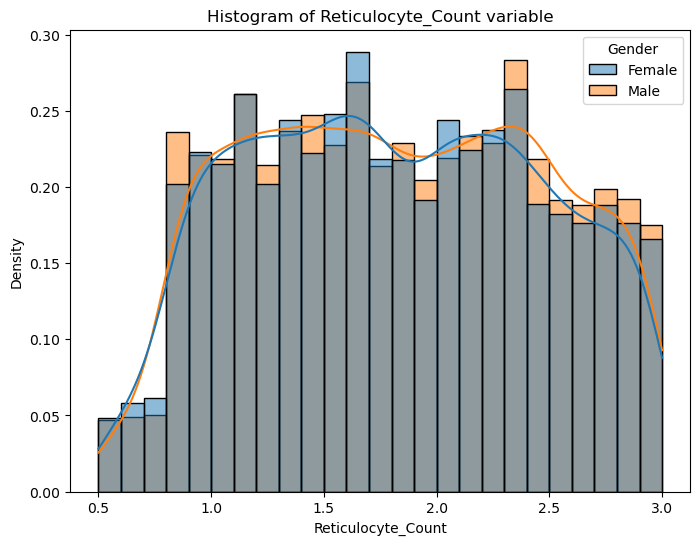

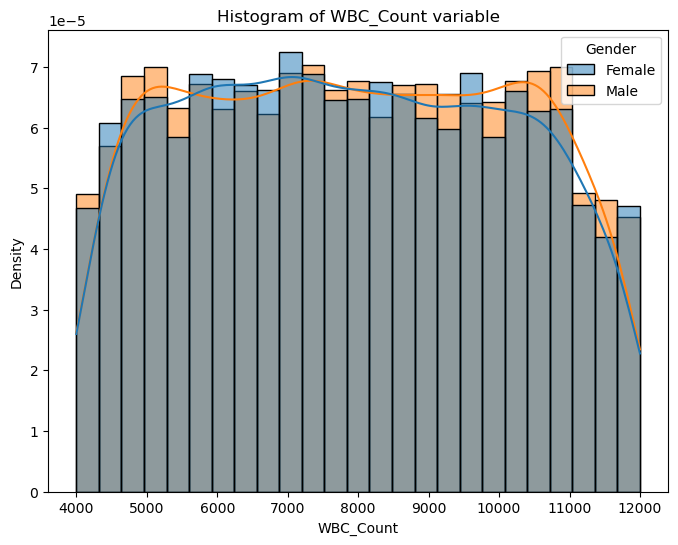

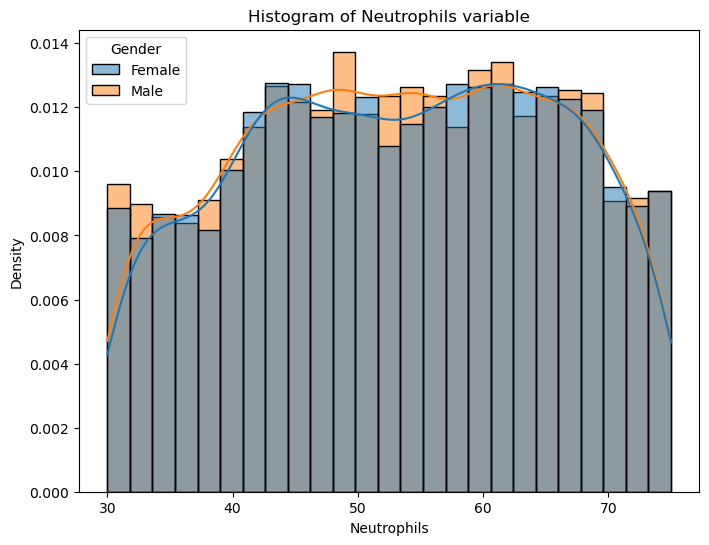

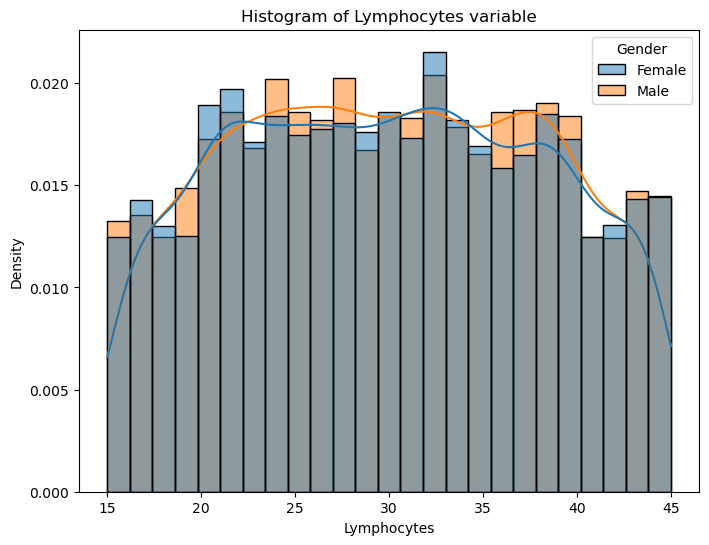

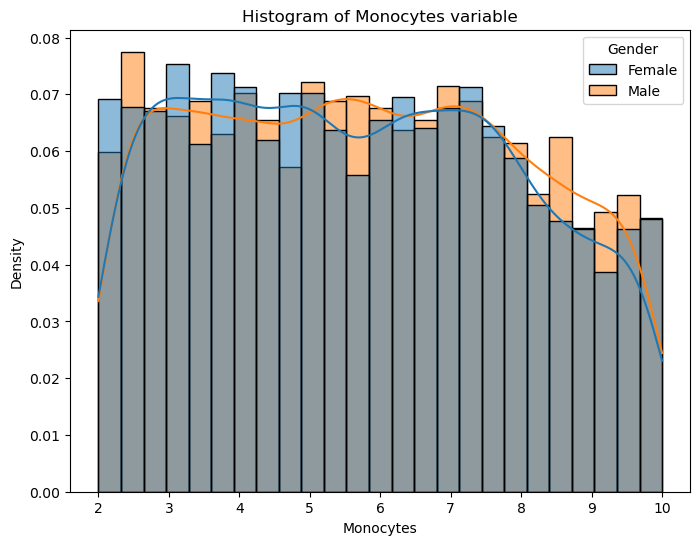

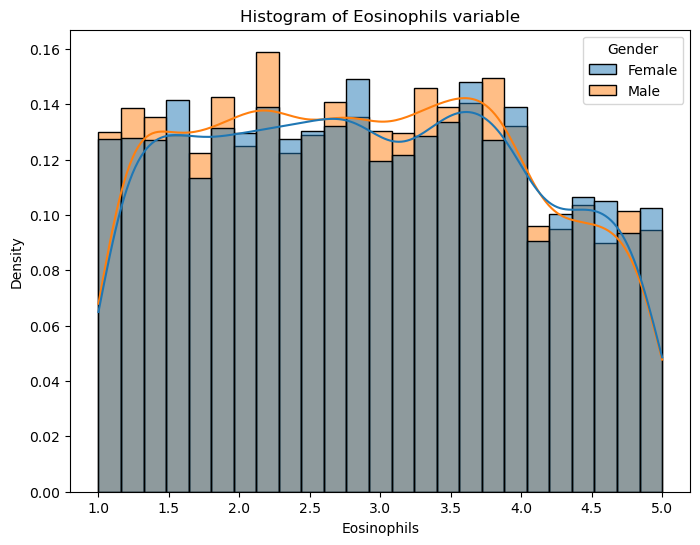

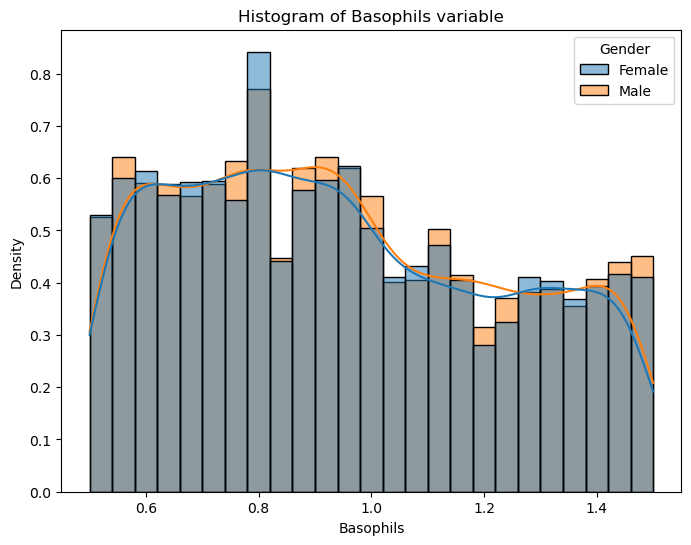

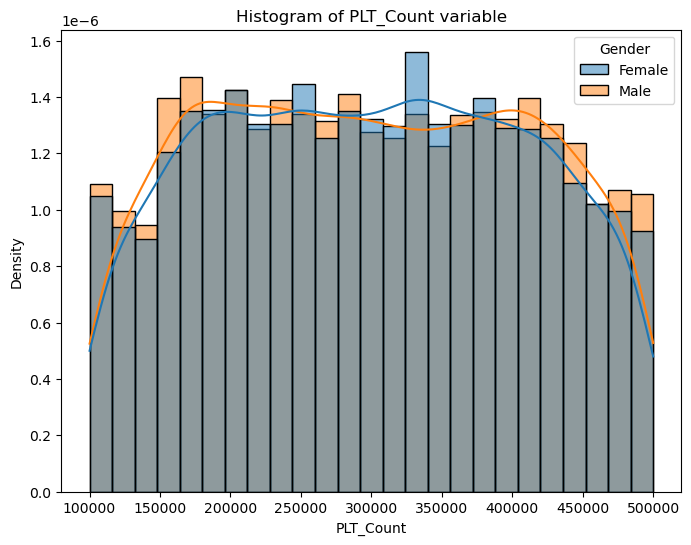

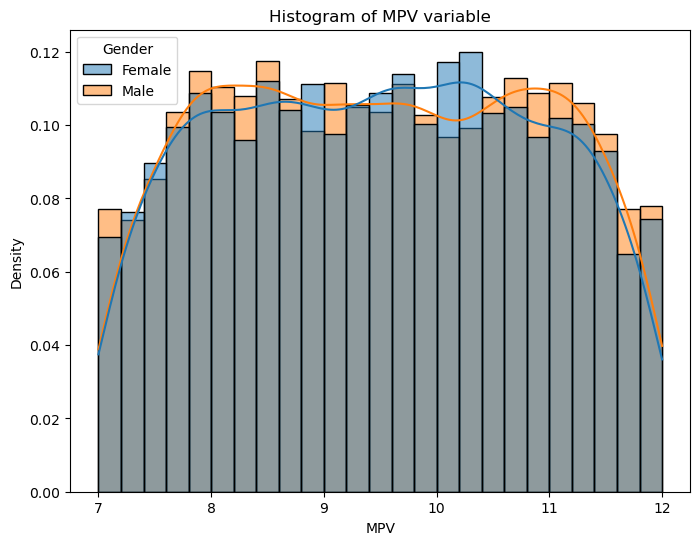

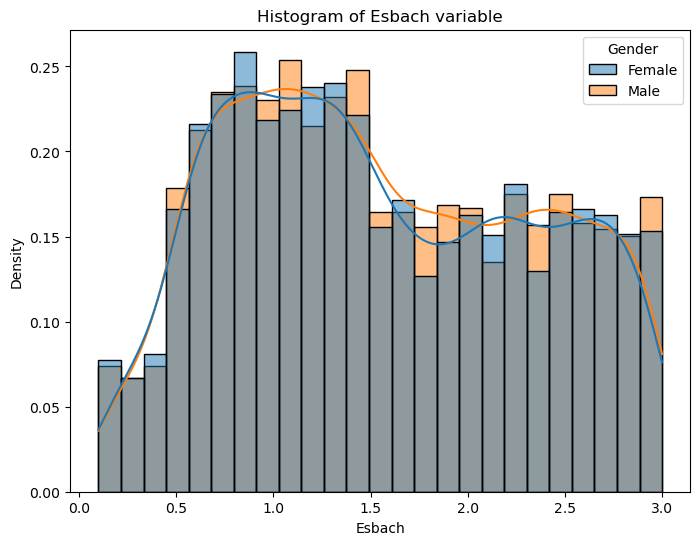

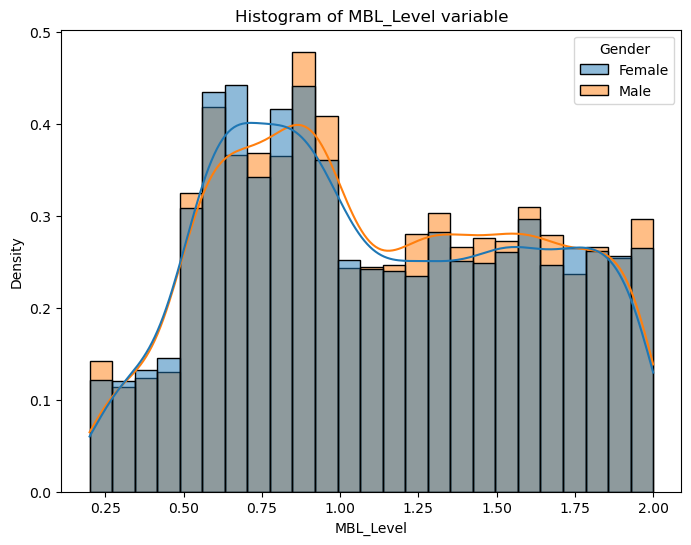

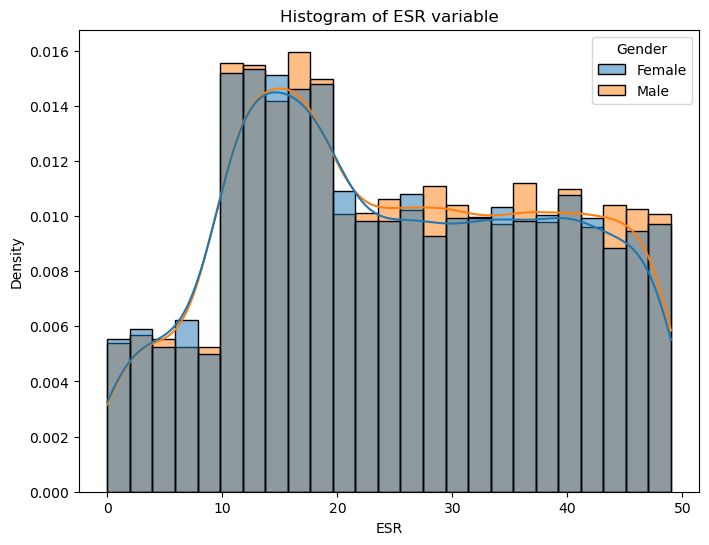

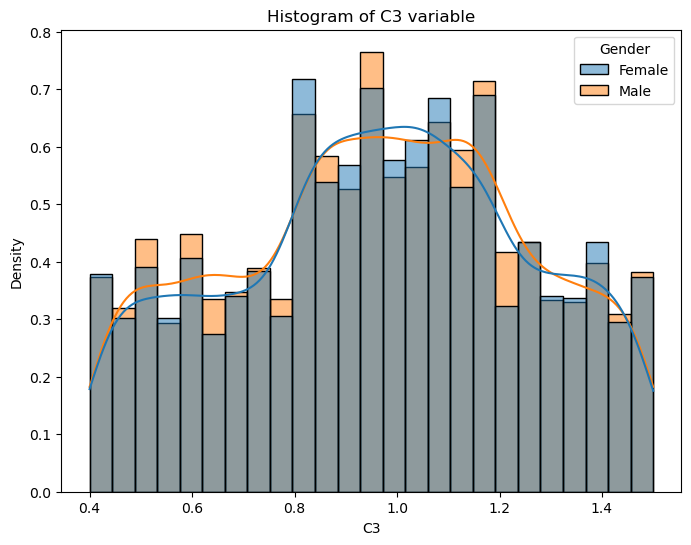

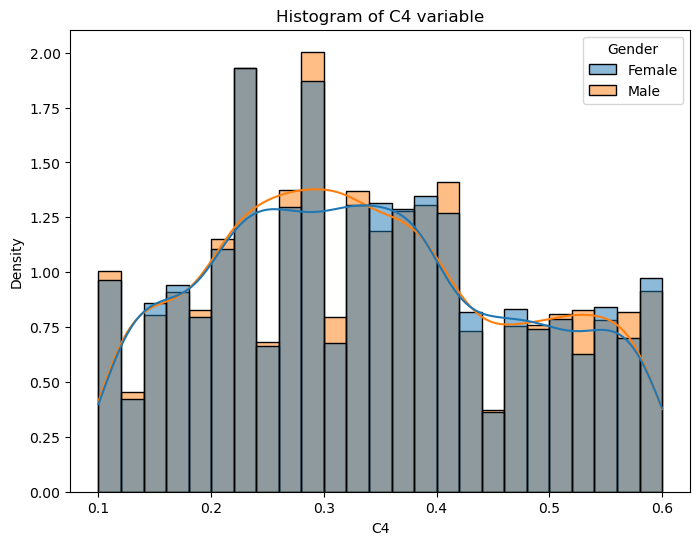

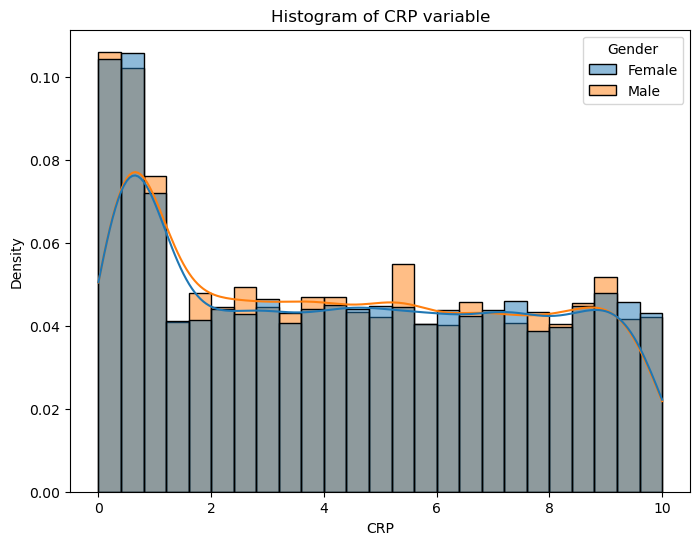

In [109]:
# histograms for numerical variables
for var in list(df.select_dtypes(include='float64').columns):
    plt.figure(figsize=(8,6))
    sns.histplot(df, x=var, bins=25, hue='Gender', kde=True, stat='density')
    plt.title(f'Histogram of {var} variable')
    plt.show()

In [110]:
df['Diseases_group'] = df['Diseases_group'].astype('category').cat.codes

In [111]:
df['Gender'] = np.where(df['Gender'] == 'Female',1,0)

In [112]:
numeric_data = df.select_dtypes(include=['float64'])

In [113]:
df['Diseases_group']

0        7
1        4
2        8
3        5
4        8
        ..
12494    6
12495    6
12496    6
12497    6
12498    6
Name: Diseases_group, Length: 12499, dtype: int8

In [114]:
numeric_data = df.select_dtypes(include=['float64','int8'])
numeric_data

Age  Sickness_Duration_Months  RBC_Count  Hemoglobin  Hematocrit  \
0      65.0                      26.0       3.54       13.18       44.35   
1      61.0                     106.0       4.97       14.73       42.39   
2      42.0                       6.0       3.91       13.66       42.41   
3      45.0                      11.0       4.57       14.96       40.10   
4      78.0                      30.0       4.88       11.21       37.58   
...     ...                       ...        ...         ...         ...   
12494  49.0                       0.0       5.22       14.42       48.42   
12495  54.0                       0.0       4.51       17.17       42.46   
12496  29.0                       0.0       4.62       13.72       43.65   
12497  34.0                       0.0       4.95       15.37       41.78   
12498  80.0                       0.0       4.66       16.29       46.29   

         MCV    MCH   MCHC    RDW  Reticulocyte_Count  WBC_Count  Neutrophils  \
0      99.85  31.80  33.12  12.52                2.08     8278.0        72.25   
1      94.86  29.94  31.07  15.15                1.21     8592.0        56.73   
2      88.26  29.43  35.61  15.52                2.68     8719.0        50.92   
3      85.95  27.42  33.93  12.14                1.79     7698.0        41.20   
4      93.16  29.87  31.29  15.65                1.42     9755.0        45.82   
...      ...    ...    ...    ...                 ...        ...          ...   
12494  91.66  30.60  32.86  12.03                2.27     7423.0        47.15   
12495  94.95  27.96  33.51  11.58                2.09     9782.0        67.33   
12496  94.54  31.00  33.55  12.25                1.48     6925.0        61.36   
12497  84.67  30.94  34.39  13.14                1.13     5136.0        51.84   
12498  88.40  29.40  33.19  14.38                0.77     8873.0        40.99   

       Lymphocytes  Monocytes  Eosinophils  Basophils  PLT_Count    MPV  \
0            19.80       9.26         4.02       1.08   429117.0   8.08   
1            42.68       2.66         1.67       1.16   487184.0   8.92   
2            31.21       6.96         4.32       1.07   499962.0   7.70   
3            33.60       6.54         3.12       0.72   129793.0  10.95   
4            42.57       3.05         4.60       1.40   467390.0  10.51   
...            ...        ...          ...        ...        ...    ...   
12494        23.92       4.69         2.61       0.50   215737.0   7.90   
12495        29.90       2.25         2.21       0.60   437118.0  10.00   
12496        25.25       4.57         1.14       0.67   353269.0   8.21   
12497        24.88       7.04         1.43       0.81   234526.0   8.58   
12498        31.21       4.30         3.95       0.60   177713.0   9.23   

       Esbach  MBL_Level   ESR    C3    C4   CRP  Diseases_group  
0        1.50       1.81  40.0  1.32  0.49  3.10               7  
1        1.76       1.08  23.0  0.40  0.17  2.73               4  
2        2.49       1.42  44.0  0.95  0.26  1.02               8  
3        0.75       1.05  25.0  1.06  0.26  5.45               5  
4        0.76       1.14  42.0  0.73  0.25  1.05               8  
...       ...        ...   ...   ...   ...   ...             ...  
12494    1.20       0.41   2.0  0.84  0.39  0.84               6  
12495    0.79       0.24  13.0  0.83  0.25  0.81               6  
12496    1.34       0.37  10.0  0.95  0.33  0.64               6  
12497    1.33       0.33  19.0  0.94  0.38  0.46               6  
12498    0.20       0.53  10.0  1.12  0.21  0.56               6  

[12499 rows x 25 columns]

In [115]:
categorical_data = df.select_dtypes(include=['int64','int32','int8'])
categorical_data

Gender  ANA  Anti-dsDNA  Anti-Sm  Rheumatoid factor  ACPA  Anti-TPO  \
0           1    1           1        1                  0     1         0   
1           0    1           0        0                  1     1         0   
2           0    1           1        0                  1     1         1   
3           1    1           0        1                  0     1         1   
4           1    1           0        1                  0     1         0   
...       ...  ...         ...      ...                ...   ...       ...   
12494       1    0           0        0                  0     0         0   
12495       0    0           0        0                  0     0         0   
12496       0    0           0        0                  0     0         0   
12497       0    0           0        0                  0     0         0   
12498       0    0           0        0                  0     0         0   

       Anti-Tg  Anti-SMA  Low-grade fever  Fatigue or chronic tiredness  \
0            1         1                0                             1   
1            1         0                1                             0   
2            1         1                0                             1   
3            1         0                1                             0   
4            0         1                0                             1   
...        ...       ...              ...                           ...   
12494        0         0                0                             0   
12495        0         0                0                             0   
12496        0         0                0                             0   
12497        0         0                0                             0   
12498        0         0                0                             0   

       Dizziness  Weight loss  Rashes and skin lesions  \
0              1            0                        0   
1              0            1                        1   
2              1            0                        1   
3              1            1                        1   
4              1            1                        0   
...          ...          ...                      ...   
12494          0            0                        0   
12495          0            0                        0   
12496          0            0                        0   
12497          0            0                        0   
12498          0            0                        0   

       Stiffness in the joints  Brittle hair or hair loss  \
0                            0                          0   
1                            0                          1   
2                            0                          0   
3                            0                          1   
4                            1                          0   
...                        ...                        ...   
12494                        0                          0   
12495                        0                          0   
12496                        0                          0   
12497                        0                          0   
12498                        0                          0   

       Dry eyes and/or mouth  General unwell feeling  Joint pain  Anti_dsDNA  \
0                          0                       1           1           0   
1                          0                       0           1           0   
2                          0                       0           0           0   
3                          1                       1           0           0   
4                          0                       1           0           0   
...                      ...                     ...         ...         ...   
12494                      0                       0           0           0   
12495                      0                       0           0           0   
12496              

In [116]:
categorical_data

Gender  ANA  Anti-dsDNA  Anti-Sm  Rheumatoid factor  ACPA  Anti-TPO  \
0           1    1           1        1                  0     1         0   
1           0    1           0        0                  1     1         0   
2           0    1           1        0                  1     1         1   
3           1    1           0        1                  0     1         1   
4           1    1           0        1                  0     1         0   
...       ...  ...         ...      ...                ...   ...       ...   
12494       1    0           0        0                  0     0         0   
12495       0    0           0        0                  0     0         0   
12496       0    0           0        0                  0     0         0   
12497       0    0           0        0                  0     0         0   
12498       0    0           0        0                  0     0         0   

       Anti-Tg  Anti-SMA  Low-grade fever  Fatigue or chronic tiredness  \
0            1         1                0                             1   
1            1         0                1                             0   
2            1         1                0                             1   
3            1         0                1                             0   
4            0         1                0                             1   
...        ...       ...              ...                           ...   
12494        0         0                0                             0   
12495        0         0                0                             0   
12496        0         0                0                             0   
12497        0         0                0                             0   
12498        0         0                0                             0   

       Dizziness  Weight loss  Rashes and skin lesions  \
0              1            0                        0   
1              0            1                        1   
2              1            0                        1   
3              1            1                        1   
4              1            1                        0   
...          ...          ...                      ...   
12494          0            0                        0   
12495          0            0                        0   
12496          0            0                        0   
12497          0            0                        0   
12498          0            0                        0   

       Stiffness in the joints  Brittle hair or hair loss  \
0                            0                          0   
1                            0                          1   
2                            0                          0   
3                            0                          1   
4                            1                          0   
...                        ...                        ...   
12494                        0                          0   
12495                        0                          0   
12496                        0                          0   
12497                        0                          0   
12498                        0                          0   

       Dry eyes and/or mouth  General unwell feeling  Joint pain  Anti_dsDNA  \
0                          0                       1           1           0   
1                          0                       0           1           0   
2                          0                       0           0           0   
3                          1                       1           0           0   
4                          0                       1           0           0   
...                      ...                     ...         ...         ...   
12494                      0                       0           0           0   
12495                      0                       0           0           0   
12496              

In [117]:
# diseases = pd.get_dummies(numeric_data['Diseases_group'], prefix='Disease')
# diseases

In [118]:
# numeric_data = numeric_data.drop(columns='Diseases_group', axis=1)

In [119]:
# numeric_data_prim = pd.concat([numeric_data, diseases], axis=1)
# numeric_data_prim

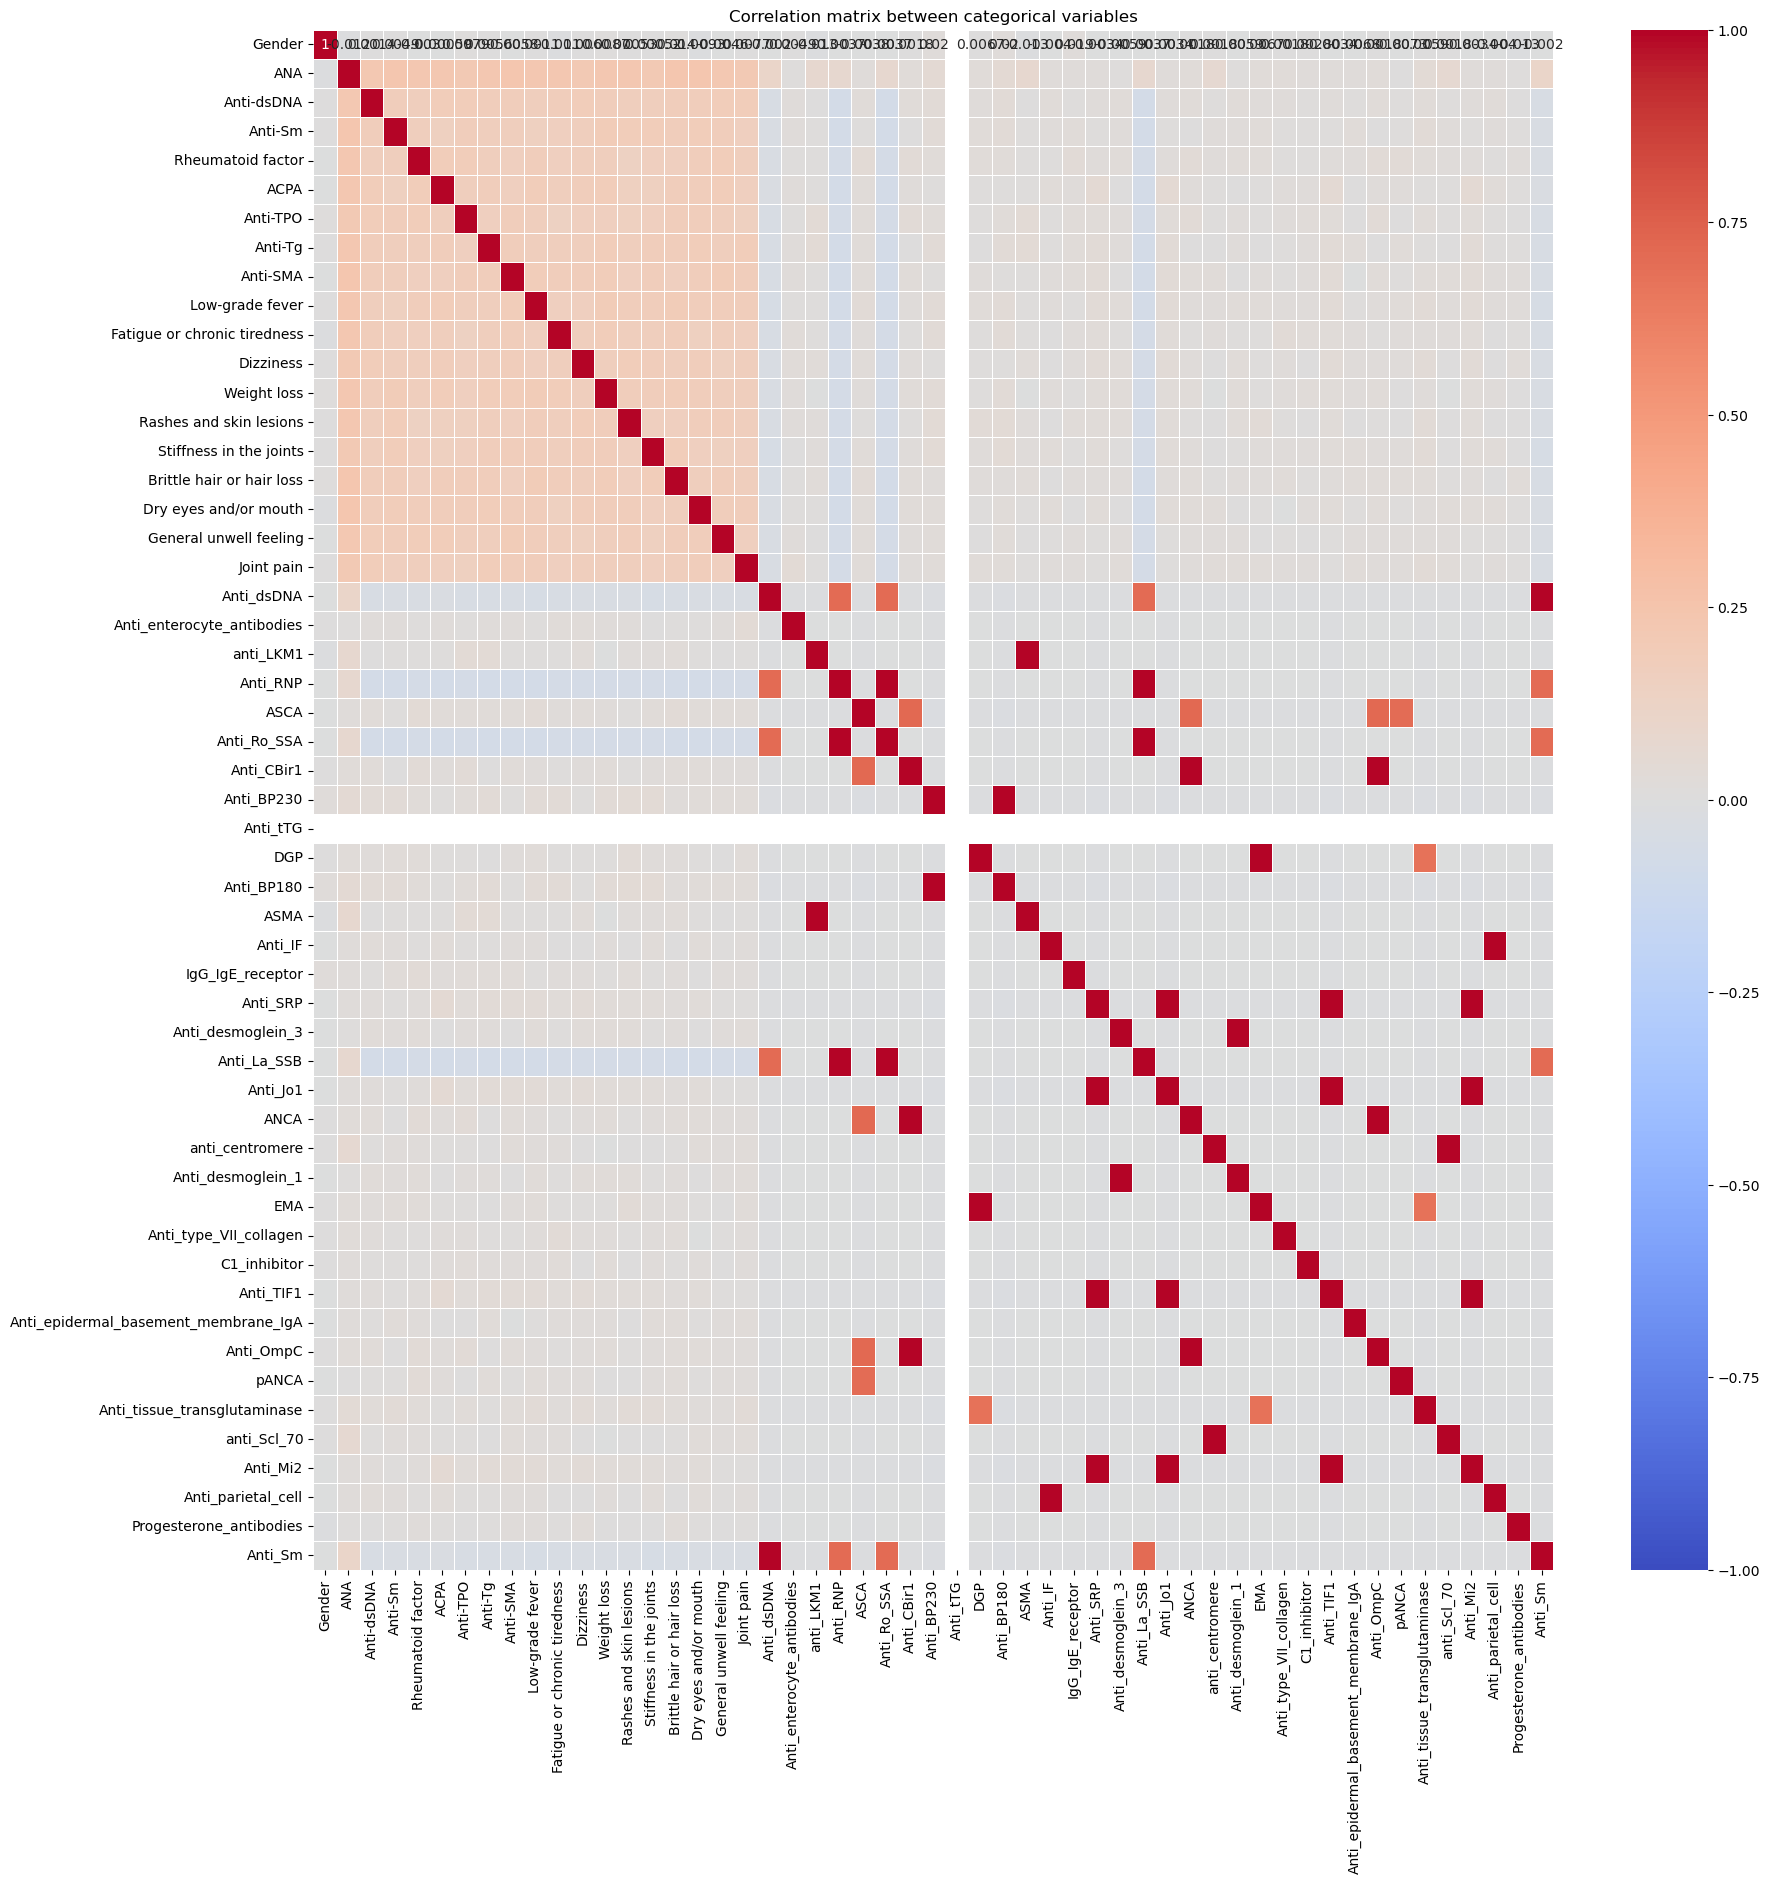

In [ ]:
cat_var_corr_matrix = categorical_data.drop(columns='Diseases_group',axis=1).corr(method='spearman')

plt.figure(figsize=(40,40))
sns.heatmap(cat_var_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation matrix between categorical variables')
plt.show()

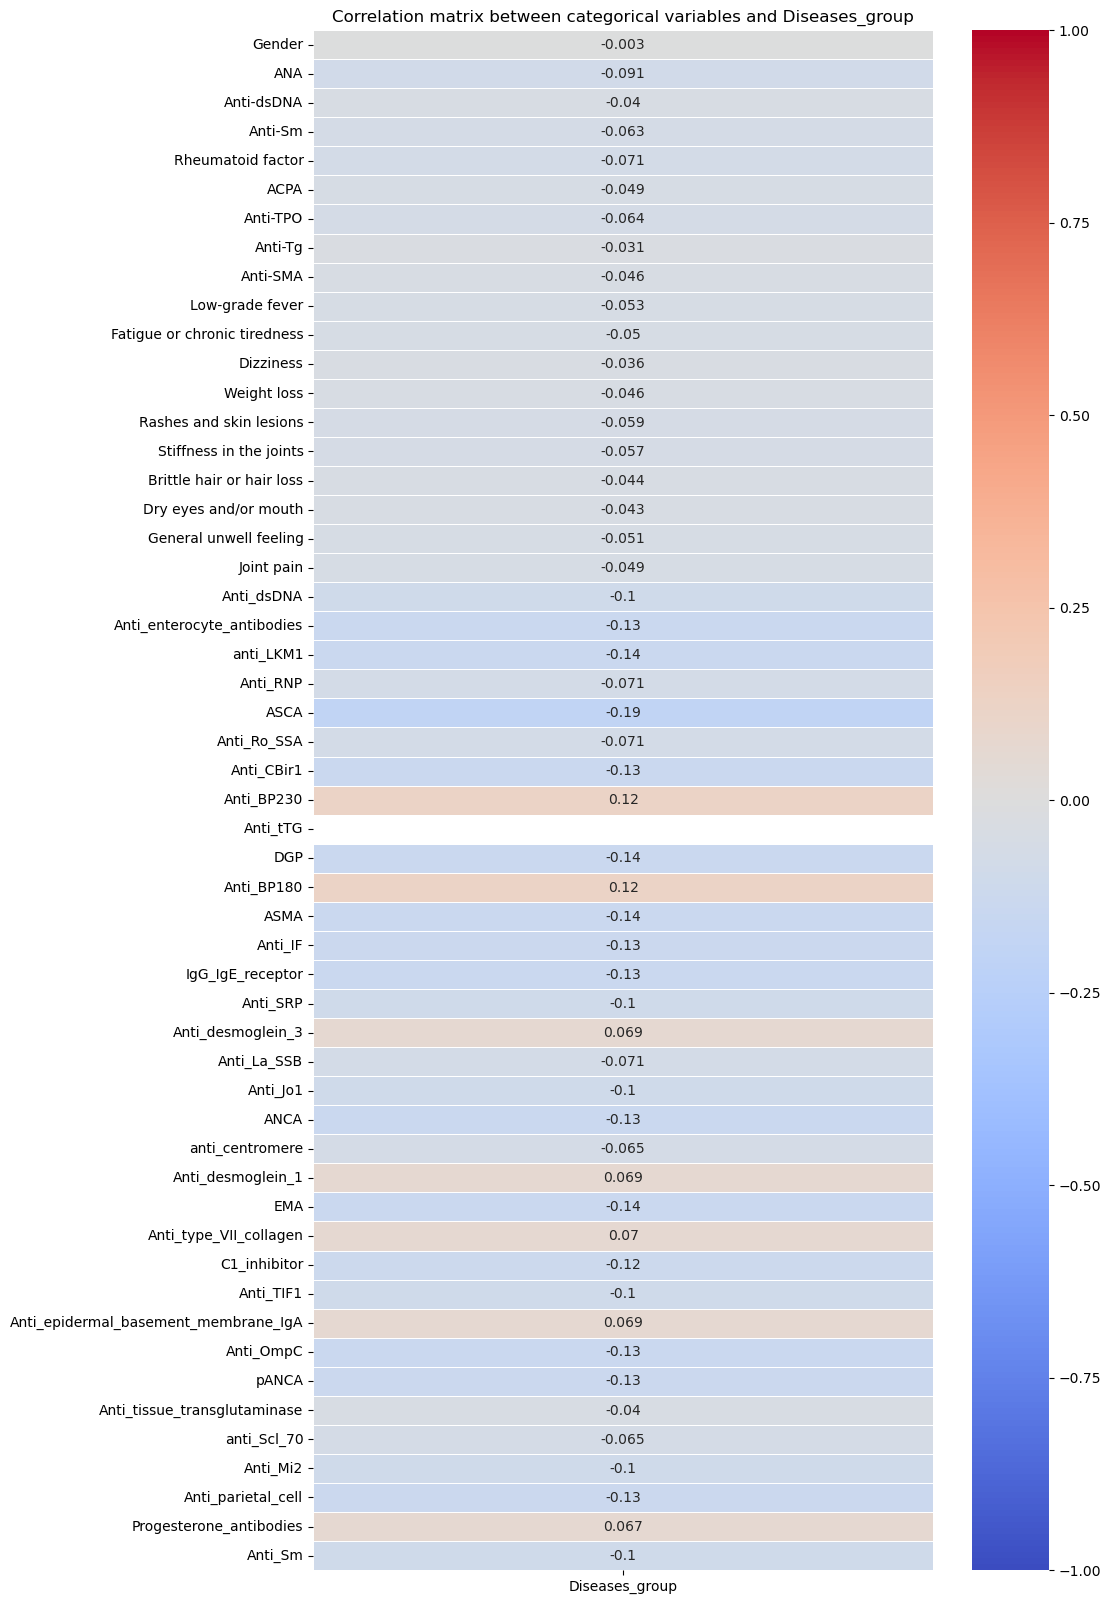

In [121]:
cat_var_y_corr_matrix = categorical_data.corr(method='spearman')

plt.figure(figsize=(10,20))
cat_diseases_corr = cat_var_y_corr_matrix[['Diseases_group']].drop('Diseases_group')
sns.heatmap(cat_diseases_corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation matrix between categorical variables and Diseases_group')
plt.show()

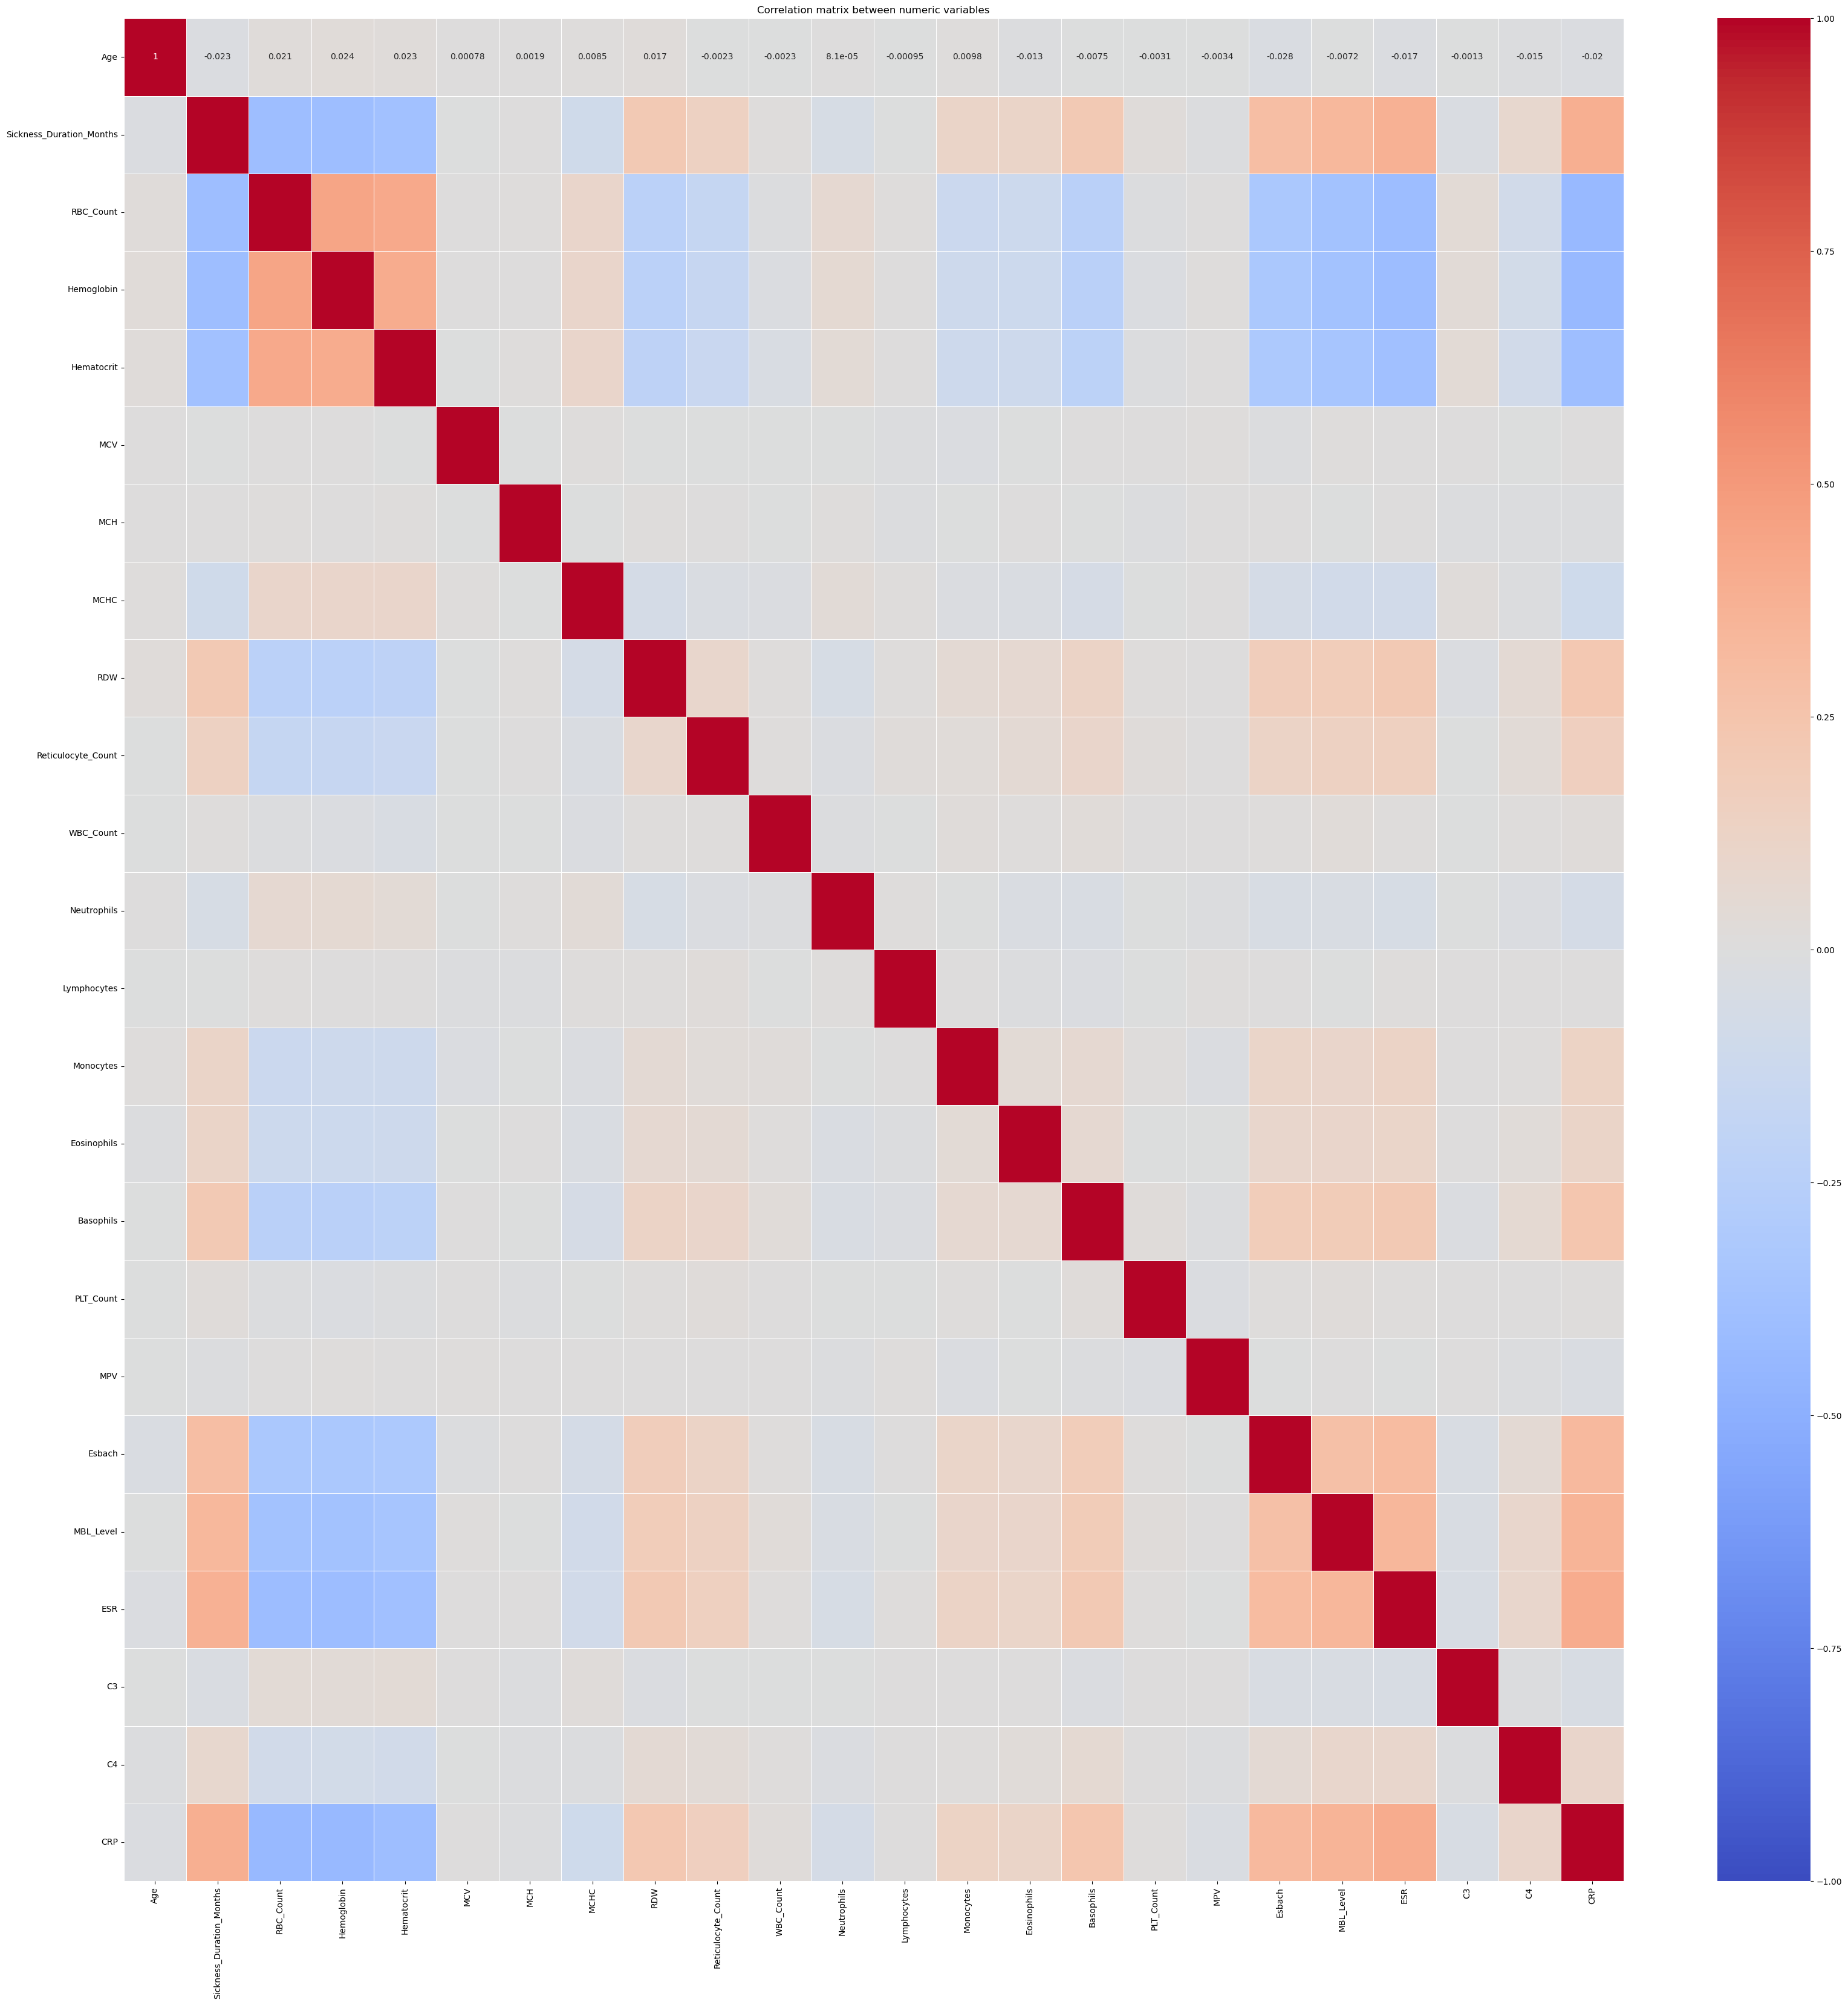

In [122]:
num_var_corr_matrix = numeric_data.drop(columns='Diseases_group',axis=1).corr(method='pearson')

# num_var_corr_matrix = numeric_data_prim.corr(method='pearson')

plt.figure(figsize=(40,40))
sns.heatmap(num_var_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation matrix between numeric variables')
plt.show()

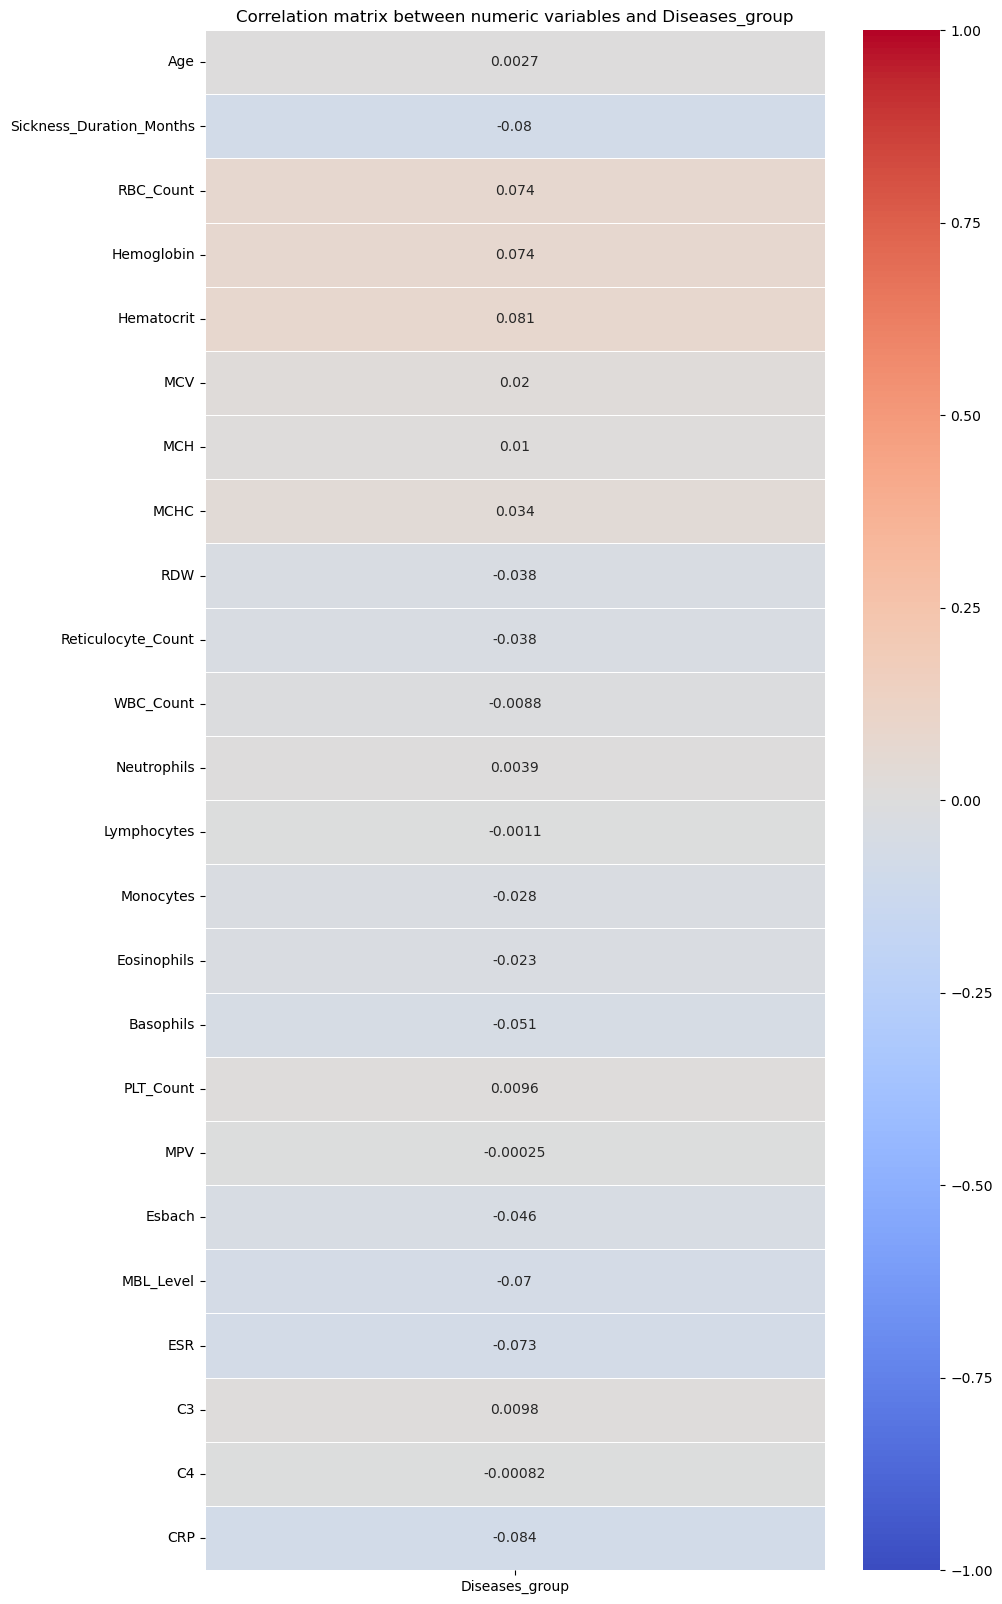

In [123]:
num_var_y_corr_matrix = numeric_data.corr(method='pearson')

plt.figure(figsize=(10,20))
num_diseases_corr = num_var_y_corr_matrix[['Diseases_group']].drop('Diseases_group')
sns.heatmap(num_diseases_corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation matrix between numeric variables and Diseases_group')
plt.show()

Because Pearson correlation values for numerical data are very low, we can check if there are some kind of different (not linear) relation between numerical columns

In [125]:
from pandas.plotting import scatter_matrix

num_attributes_1 = ['Age', 'Sickness_Duration_Months', 'RBC_Count', 'Hemoglobin', 'Hematocrit', 'MCV', 'MCH']

num_attributes_2 = ['MCHC', 'RDW', 'Reticulocyte_Count', 'WBC_Count', 'Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils']

num_attributes_3 = ['Basophils', 'PLT_Count', 'MPV', 'Esbach', 'MBL_Level', 'ESR', 'C3', 'C4', 'CRP']

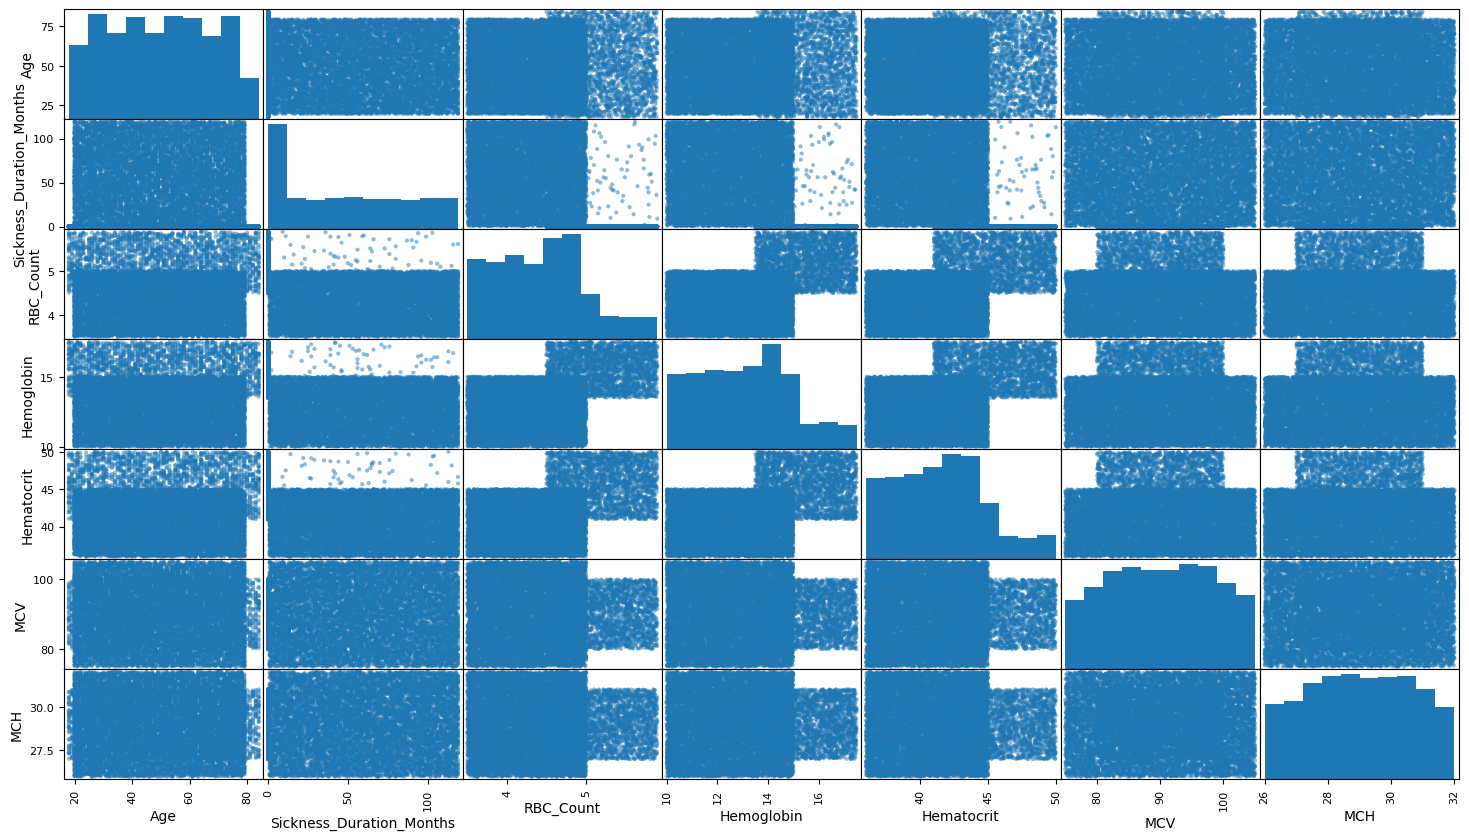

In [126]:
scatter_matrix(numeric_data[num_attributes_1],figsize=(18,10))
plt.show()

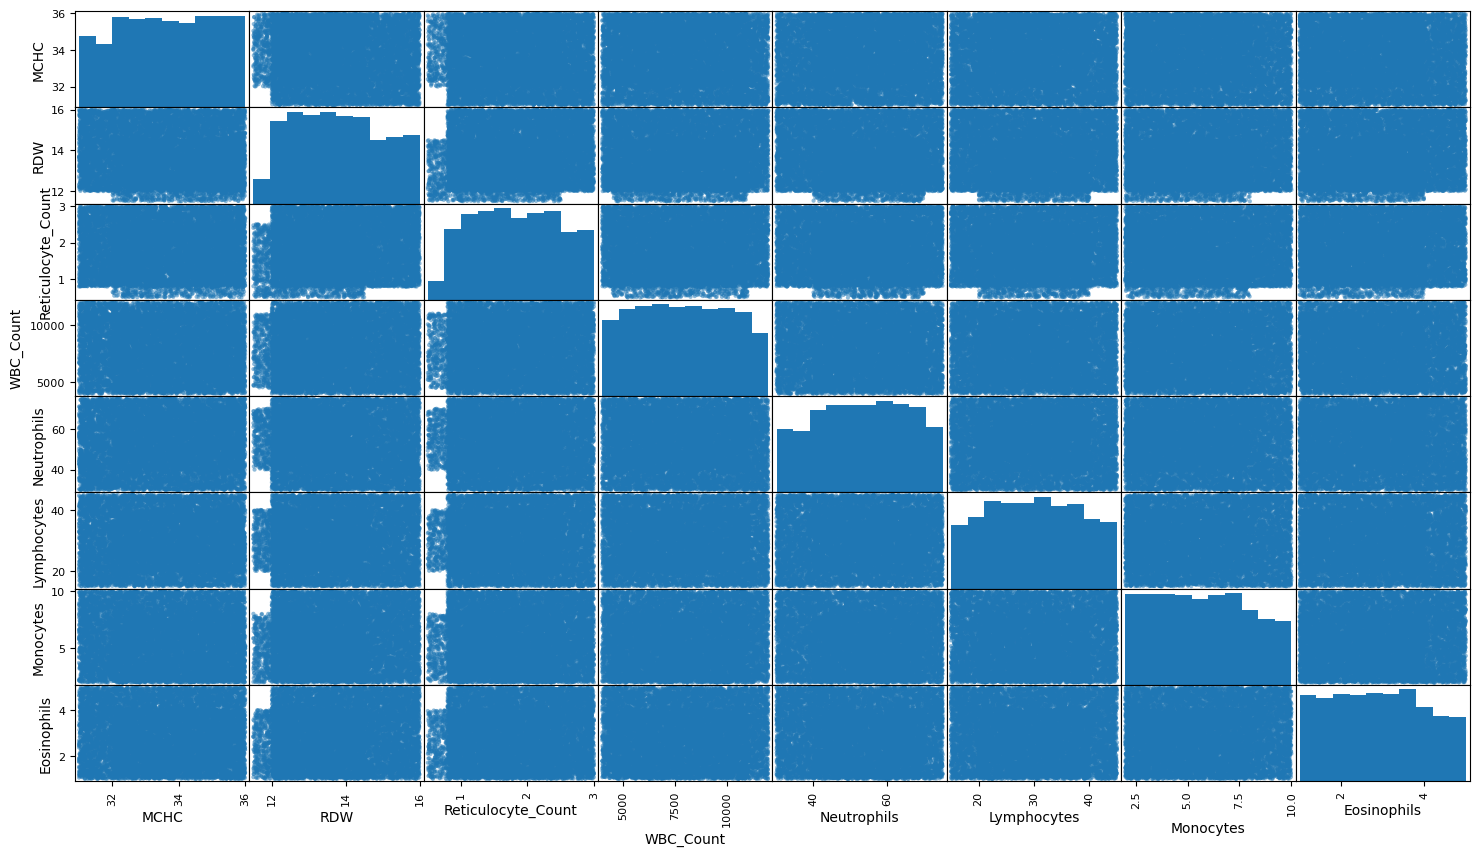

In [127]:
scatter_matrix(numeric_data[num_attributes_2],figsize=(18,10))
plt.show()

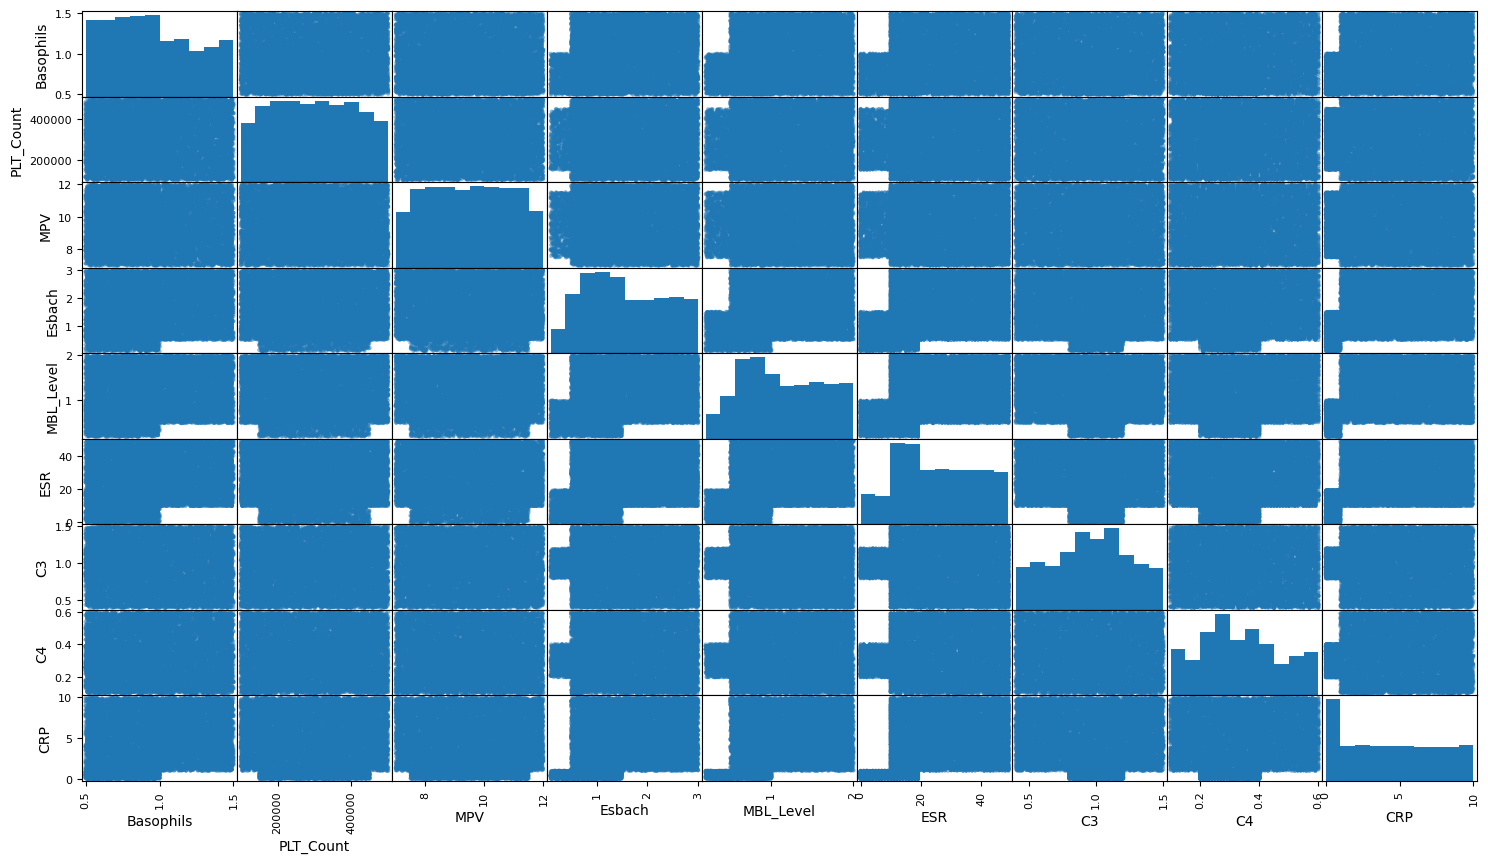

In [128]:
scatter_matrix(numeric_data[num_attributes_3],figsize=(18,10))
plt.show()

In [134]:
binary_low_variance_col = [
    "Anti_dsDNA", "Anti_enterocyte_antibodies", "anti_LKM1", "Anti_RNP", "ASCA",
    "Anti_Ro_SSA", "Anti_CBir1", "Anti_BP230", "DGP", "Anti_BP180", "ASMA", "Anti_IF",
    "IgG_IgE_receptor", "Anti_SRP", "Anti_desmoglein_3", "Anti_La_SSB", "Anti_Jo1",
    "ANCA", "anti_centromere", "Anti_desmoglein_1", "EMA", "Anti_type_VII_collagen",
    "C1_inhibitor", "Anti_TIF1", "Anti_epidermal_basement_membrane_IgA", "Anti_OmpC",
    "pANCA", "Anti_tissue_transglutaminase", "anti_Scl_70", "Anti_Mi2", "Anti_parietal_cell",
    "Progesterone_antibodies", "Anti_Sm"
]

for col in binary_low_variance_col:
    crosstab_table = pd.crosstab(df[col], df['Diseases_group'])
    print(f"Crosstab for {col} and Diseases_group:")
    print(crosstab_table)
    print("\n" + "-"*80 + "\n")

Crosstab for Anti_dsDNA and Diseases_group:
Diseases_group    0    1    2     3    4     5     6     7     8     9
Anti_dsDNA                                                            
0               561  514  431  1258  921  2122  2499  1387  1222  1399
1                 0    0    0     0  185     0     0     0     0     0

--------------------------------------------------------------------------------

Crosstab for Anti_enterocyte_antibodies and Diseases_group:
Diseases_group                0    1    2     3     4     5     6     7     8  \
Anti_enterocyte_antibodies                                                      
0                           481  514  431  1258  1106  2122  2499  1387  1222   
1                            80    0    0     0     0     0     0     0     0   

Diseases_group                 9  
Anti_enterocyte_antibodies        
0                           1399  
1                              0  

---------------------------------------------------------------

**Summary of Data Preprocessing and EDA for Classification Model**

 - Data Type Conversion: Data types of certain variables were converted from 'object' to 'float' or 'int' as needed for numerical operations.
 - Missing Data Handling: Rows containing missing values were removed from the dataset.
 - Duplicate Removal: There were no duplicate records in the dataset.
 - Outlier Detection and Correction: Outliers and erroneous values were detected using z-score analysis for numerical variables and frequency distribution analysis for binary and categorical variables. No outliers or erroneous values were found.
 - Low Variance Features: Features with extremely low variance (e.g., where 97% or more of the values belong to one category) were identified: Anti_dsDNA, Anti_enterocyte_antibodies, anti_LKM1, Anti_RNP, ASCA, Anti_Ro_SSA, Anti_CBir1, Anti_BP230, DGP, Anti_BP180, ASMA, Anti_IF, IgG_IgE_receptor, Anti_SRP, Anti_desmoglein_3, Anti_La_SSB, Anti_Jo1, ANCA, anti_centromere, Anti_desmoglein_1, EMA, Anti_type_VII_collagen, C1_inhibitor, Anti_TIF1, Anti_epidermal_basement_membrane_IgA, Anti_OmpC, pANCA, Anti_tissue_transglutaminase, anti_Scl_70, Anti_Mi2, Anti_parietal_cell, Progesterone_antibodies, Anti_Sm. While these features have low predictive power in general, they might still be informative for specific disease groups (as you can see on crosstab analysis each of these features exhibits a positive outcome (1) exclusively for a single disease group).
 - Numerical Feature Distributions: Numerical features were analyzed for skewness and multimodality. No severe issues were found. However, due to different scaling, feature scaling will be necessary before model training.
 - Text and Categorical Features: Textual features were removed, and categorical features were converted into dummy variables.
 - Spearman rank correlation analysis for categorical columns and Pearson correlation analysis for numerical columns showed a weak or no linear correlation between them. However, the same analysis revealed that for some attributes, the correlation coefficient was 1, or (for the variable Anti_tTG) the correlation could not be calculated due to all values being 0. Consequently, the following variables will be removed from the dataset: Anti_tTG, Anti_RNP, anti_LKM1, anti_dsDNA, Anti_Ro_SSA, Anti_CBir1, Anti_BP230, DGP, Anti_IF, ANti_SRP, Anti_desmoglein_3, Anti_Io1, ANCA, anti_centromere, Anti_TIF1.
 - Scatter Plots: Scatter plots revealed non-linear relationships between some numerical variables, suggesting that more complex models might be needed to capture these relationships.

**Key preprocessing/EDA steps included:**
 - Data cleaning: handling missing values, duplicates, and outliers.
 - Feature engineering: creating dummy variables for categorical features. 
 - Feature selection: removing features with low/no variance, high (equal 1) correlation, and those that were not informative for the classification task.
 - Data analysis (distributions, correlations, crosstabs, frequency distributions)

**Next steps:**
 - Removing attributes described above.
 - Scaling numerical features.
 - Splitting the data into training and testing sets.
 - Selecting and training various classification models.
 - Hyperparameter optimization.
 - Model evaluation and selection based on performance metrics.

 